# Personal Information
Name: **Merel Kämper**

StudentID: **15137015**

Email: **merel.kamper@student.uva.nl**

Submitted on: **22.03.2024**

## Data Context
There are two datasets that I will evaluate in this Exploratory Data Analysis. Both can be found on the website of [rijdendetreinen.nl](https://www.rijdendetreinen.nl/en/open-data). First there is the [disruptions dataset](https://www.rijdendetreinen.nl/en/open-data/disruptions), which includes all train disruptions since 2011. In this dataset we can find the affected lines, the cause of the disruption, and the minutes of the disruptions. It is important to realize that this data is about disruptions which have been communicated by NS. Not every train that is delayed or cancelled is communicated by NS as a disruption; the rule of thumb that NS uses is that a disruption is communicated when multiple trains are delayed or cancelled (i.e. a major impact of the train service).

The second dataset that will be analyzed in this EDA includes [all train services](https://www.rijdendetreinen.nl/en/open-data/train-archive) in the Netherlands since 2019. Each row in these files represent a stop at a station. Each service at least departs from and arrives at a station (i.e. two rows). For each stop, you can find the name of the station, the arrival and departure time, delays and cancellations. 

## Data Description
After I downloaded both datasets from [rijdendetreinen.nl](https://www.rijdendetreinen.nl/en/open-data) I will load them into this notebook. In every section of the EDA I will make the distinction between the service data and the disruption data. When both datasets are loaded into the notebook, the data evaluation will start. In section 2a, I will start with an overview of the general distribution of the datapoints (being the train rides); after which I will dive into the delays and see how those are divided over time and between trajectories. Subsequently, I will evaluate the disruption data, again starting with the general distribution of data points. In the analysis of the disruptions, you will see that there are many large outliers that will be evaluated in the last section of part 2. 
I chose to finish with data cleaning, something that is normally done at the beginning of a data pipeline. However, I chose to evaluate the data first to see what aspects can be useful and which parts of the data I will not need and can be erased. Another reason for putting the data cleaning at the end is that the datasets are quite 'clean' already. There are no NULL values or columns with text that need to be cleaned or normalized.


## Table of Contents
1. [Part 1: Data Loading](#part-1:-data-loading)\
        [1a. Service Data](#1a.-service-data)\
        [1b. Disruption Data](#1b.-disruption-data)
2. [Part 2: Data Cleaning](#part-2:-data-cleaning)\
        [2a. Service Data](#2a.-service-data)\
        [2b. Disruption Data](#2b.-disruption-data)
3. [Part 3: Data Transformation](#part-3:-data-transformation)
4. [Part 4: Data Evaluation](#part-4:-data-analysis)\
        [4a. Service Data](#3a.-service-data)\
            - [General Distribution](#3a1.-general-distribution)\
            - [Delays](#3a2.-delays)\
        [4b. Disruption Data](#3b.-disruption-data)\
            - [General Distribution](#3b1.-general-distribution)\
            - [Disruptions](#3b2.-disruptions)\
            - [Outliers](#3b3.-outliers)

## Part 1: Data Loading <a name="part-1:-data-loading"></a>

In [1]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Service Data <a name="1a.-service-data"></a>

In [2]:
# Load data from path
folder_path1 = '/Users/merelkamper/Documents/MSc Data Science/Thesis/MSc-Thesis-main/adapted/data/train_rides'
files1 = os.listdir(folder_path1)
dfs1 = []

for file1 in files1:
    if file1.endswith('.csv'):
        # Extract the year from the filename
        year_service = file1.split('-')[1].split('.')[0] 
        file_path1 = os.path.join(folder_path1, file1)
        df1 = pd.read_csv(file_path1)
        # Add a new column for the year
        df1['Year'] = year_service
        dfs1.append(df1)

# Combine different files                
combined_df_service = pd.concat(dfs1, ignore_index=True)

In [7]:
subset = combined_df_service[combined_df_service['Service:RDT-ID'] == 12704321]
subset

,Service:RDT-ID,Service:Date,Service:Type,Service:Company,Service:Train number,Service:Completely cancelled,Service:Partly cancelled,Service:Maximum delay,Stop:RDT-ID,Stop:Station code,Stop:Station name,Stop:Arrival time,Stop:Arrival delay,Stop:Arrival cancelled,Stop:Departure time,Stop:Departure delay,Stop:Departure cancelled,Year
64038875,12704321,2023-12-31,Sprinter,NS,304055,False,True,4,114441623,UTG,Uitgeest,NaN,NaN,NaN,2023-12-31T14:18:00+01:00,0.0,True,2023
64038876,12704321,2023-12-31,Sprinter,NS,304055,False,True,0,114441624,KMA,Krommenie-Assendelft,2023-12-31T14:23:00+01:00,0.0,True,2023-12-31T14:23:00+01:00,0.0,True,2023
64038877,12704321,2023-12-31,Sprinter,NS,304055,False,True,0,114441625,WM,Wormerveer,2023-12-31T14:26:00+01:00,0.0,True,2023-12-31T14:26:00+01:00,0.0,True,2023
64038878,12704321,2023-12-31,Sprinter,NS,304055,False,True,0,114441626,ZZS,Zaandijk Zaanse Schans,2023-12-31T14:29:00+01:00,0.0,True,2023-12-31T14:29:00+01:00,0.0,True,2023
64038879,12704321,2023-12-31,Sprinter,NS,304055,False,True,0,114441627,KZ,Koog aan de Zaan,2023-12-31T14:32:00+01:00,0.0,True,2023-12-31T14:32:00+01:00,0.0,True,2023
64038880,12704321,2023-12-31,Sprinter,NS,304055,False,True,0,114441628,ZD,Zaandam,2023-12-31T14:35:00+01:00,0.0,True,2023-12-31T14:35:00+01:00,0.0,True,2023
64038881,12704321,2023-12-31,Sprinter,NS,304055,False,True,0,114441629,ASS,Amsterdam Sloterdijk,2023-12-31T14:41:00+01:00,0.0,True,2023-12-31T14:41:00+01:00,0.0,True,2023
64038882,12704321,2023-12-31,Sprinter,NS,304055,False,True,0,114441630,ASD,Amsterdam Centraal,2023-12-31T14:47:00+01:00,0.0,True,2023-12-31T14:49:00+01:00,0.0,True,2023
64038883,12704321,2023-12-31,Sprinter,NS,304055,False,True,0,114441631,ASDM,Amsterdam Muiderpoort,2023-12-31T14:54:00+01:00,0.0,True,2023-12-31T14:54:00+01:00,0.0,True,2023
64038884,12704321,2023-12-31,Sprinter,NS,304055,False,True,0,114441632,ASA,Amsterdam Amstel,2023-12-31T14:58:00+01:00,0.0,True,2023-12-31T14:58:00+01:00,0.0,True,2023


### Disruption Data <a name="1b.-disruption-data"></a>

In [3]:
# Load data from path
folder_path2 = '/Users/merelkamper/Documents/MSc Data Science/Thesis/MSc-Thesis-main/disruptions_data'
files2 = os.listdir(folder_path2)
dfs2 = []

for file2 in files2:
    if file2.endswith('.csv'):
        # Extract the year from the filename
        year_disruption = file2.split('-')[1].split('.')[0]
        file_path2 = os.path.join(folder_path2, file2)
        df2 = pd.read_csv(file_path2)
        # Add a new column for the year
        df2['Year'] = year_disruption
        dfs2.append(df2)

# Combine different files                
combined_df_disruptions = pd.concat(dfs2, ignore_index=True)

## Part 2: Data Cleaning <a name="part-2:-data-cleaning"></a>

### Service Data <a name="2a.-service-data"></a>

#### Filter NS data

In [5]:
# Filter all NS data and skip the rest from the DataFrame
ns_data = combined_df_service[combined_df_service['Service:Company'].str.lower() == 'ns']
other_data = combined_df_service[combined_df_service['Service:Company'].str.lower() != 'ns']

# Count the number of unique NS trajectories
num_ns_trajectories = ns_data['Service:RDT-ID'].nunique()

# Count the number of unique trajectories in non-NS data
num_other_trajectories = other_data['Service:RDT-ID'].nunique()

print("Number of NS trajectories:", num_ns_trajectories)
print("Number of non-NS trajectories:", num_other_trajectories)

Number of NS trajectories: 7612414
Number of non-NS trajectories: 4339981


#### Filter cancelled rides

In [6]:
# Count the number of completely cancelled trajectories for NS data
cancelled_trajectories = ns_data.groupby('Service:RDT-ID')['Service:Completely cancelled'].all().sum()

print("Number of completely cancelled trajectories in NS data:", cancelled_trajectories)

# Get the indices of completely cancelled trajectories
cancelled_trajectory_indices = ns_data.groupby('Service:RDT-ID')['Service:Completely cancelled'].all()
cancelled_trajectory_indices = cancelled_trajectory_indices[cancelled_trajectory_indices].index

# Remove completely cancelled trajectories from the NS data
ns_data = ns_data[~ns_data['Service:RDT-ID'].isin(cancelled_trajectory_indices)]

Number of completely cancelled trajectories in NS data: 433461


#### Filter rare trajectories

In [7]:
# Extract the first and last stops of each trajectory
first_stop = ns_data.groupby('Service:RDT-ID')['Stop:Station name'].first()
last_stop = ns_data.groupby('Service:RDT-ID')['Stop:Station name'].last()

# Create a DataFrame containing the trajectory name and count how many times each trajectory appears
trajectories_df = pd.DataFrame({'Trajectory': first_stop + ' - ' + last_stop})
trajectories_df['Count'] = trajectories_df.groupby('Trajectory')['Trajectory'].transform('count')
trajectories_df = trajectories_df.drop_duplicates()

# Filter out rare trajectories (< 50 occurrences)
rare_trajectories = trajectories_df[trajectories_df['Count'] < 50]['Trajectory']

# Get the number of rare trajectories
num_rare_trajectories = len(rare_trajectories)

# Get the RDT-IDs of rare trajectories
rare_trajectory_rdt_ids = ns_data[ns_data['Service:RDT-ID'].isin(rare_trajectories.index)]['Service:RDT-ID'].unique()

# Remove rare trajectories from the NS data
ns_data_definite = ns_data[~ns_data['Service:RDT-ID'].isin(rare_trajectory_rdt_ids)]

print("Number of rare trajectories:", num_rare_trajectories)

Number of rare trajectories: 2634


In [22]:
num_trajectories_definite = ns_data_definite['Service:RDT-ID'].nunique()
print("Number of trajectories in ns_data_definite:", num_trajectories_definite)

Number of trajectories in ns_data_definite: 7176319


#### Count different delay thresholds

In [25]:
# Filter ns_data_definite for rows where the maximum delay is 0
zero_delay_trajectories = ns_data_definite[ns_data_definite.groupby('Service:RDT-ID')['Service:Maximum delay'].transform('first') == 0]

# Count the number of unique trajectories with a maximum delay of 0
num_zero_delay_trajectories = zero_delay_trajectories['Service:RDT-ID'].nunique()

print("Number of trajectories with maximum delay of 0 minutes:", num_zero_delay_trajectories)

# Define the threshold ranges
thresholds = [(1, 5), (6, 10), (11, 15), (16, float('inf'))]

# Initialize a dictionary to store trajectory counts for each threshold range
delay_counts = {}

# Calculate trajectory counts for each threshold range
for min_delay, max_delay in thresholds:
    # Filter ns_data_definite for rows where the maximum delay is within the current threshold range
    filtered_trajectories = ns_data_definite[(ns_data_definite.groupby('Service:RDT-ID')['Service:Maximum delay'].transform('first') >= min_delay) & (ns_data_definite.groupby('Service:RDT-ID')['Service:Maximum delay'].transform('first') <= max_delay)]
    
    # Count the number of unique trajectories within the current threshold range
    count = filtered_trajectories['Service:RDT-ID'].nunique()
    
    # Store the count in the delay_counts dictionary
    delay_counts[f'{min_delay}-{max_delay} minutes'] = count

# Print the trajectory counts for each threshold range
for threshold, count in delay_counts.items():
    print(f"Number of trajectories with maximum delay of {threshold}: {count}")

Number of trajectories with maximum delay of 0 minutes: 2533492
Number of trajectories with maximum delay of 1-5 minutes: 4151554
Number of trajectories with maximum delay of 6-10 minutes: 318014
Number of trajectories with maximum delay of 11-15 minutes: 91477
Number of trajectories with maximum delay of 16-inf minutes: 81779


: 

### Disruption Data <a name="2b.-service-data"></a>

In [ ]:
# TODO
# clean disruption dataset
# which columns do I not need?
# what values can I not use?


## Part 3: Data Transformation <a name="part-3:-data-transformation"></a>

#### Transformation of dataset

In this part I will transform my DataFrame to create a new DataFrame that I can use in my analysis. 

In [9]:
# Check if there are no duplicate RDT-ID's
grouped1 = ns_data_definite.groupby('Service:RDT-ID')['Service:Date']
print(len(grouped1))

grouped2 = ns_data_definite.groupby('Service:RDT-ID')
print(len(grouped2))

7176319
7176319


In [9]:
# Group the data by unique RDT-ID to aggregate information for each trajectory
grouped = ns_data_definite.groupby('Service:RDT-ID')

# 1. RDT-ID of the trajectory
rdt_ids = grouped['Service:RDT-ID'].unique()

# # 2. Trajectory
trajectories = ns_data_definite.groupby('Service:RDT-ID')['Stop:Station name'].agg(['first', 'last']).agg(' - '.join, axis=1)

# # 3. Data of the Trajectory
dates = grouped['Service:Date'].first()

# # 4. Departure Delay
departure_delays = grouped['Stop:Departure delay'].sum()

# # 5. Arrival Delay
arrival_delays = grouped['Stop:Arrival delay'].sum()

# # 6. Maximum Delay
max_delays = grouped['Service:Maximum delay'].first()

# Create the new DataFrame
new_df = pd.DataFrame({
     'RDT-ID': rdt_ids,
     'Trajectory': trajectories,
     'Date of the Trajectory': dates,
     'Departure Delay': departure_delays,
     'Arrival Delay': arrival_delays,
     'Maximum Delay': max_delays,
 })

# Convert 'Date of the Trajectory' column to datetime format
new_df['Date of the Trajectory'] = pd.to_datetime(new_df['Date of the Trajectory'])

# Extract the day of the week and add to the dataframe
new_df['Day of the Week'] = new_df['Date of the Trajectory'].dt.day_name()

In [10]:
new_df

,RDT-ID,Trajectory,Date of the Trajectory,Departure Delay,Arrival Delay,Maximum Delay,Day of the Week
Service:RDT-ID,,,,,,,
738804,[738804],Rotterdam Centraal - Utrecht Centraal,2019-01-01,2.0,2.0,1,Tuesday
738805,[738805],Utrecht Centraal - Rotterdam Centraal,2019-01-01,2.0,2.0,2,Tuesday
738806,[738806],Rotterdam Centraal - Utrecht Centraal,2019-01-01,3.0,4.0,2,Tuesday
738807,[738807],Utrecht Centraal - Rotterdam Centraal,2019-01-01,0.0,3.0,2,Tuesday
738808,[738808],Rotterdam Centraal - Utrecht Centraal,2019-01-01,2.0,0.0,1,Tuesday
...,...,...,...,...,...,...,...
12703954,[12703954],Tiel - Leiden Centraal,2023-12-31,85.0,73.0,10,Sunday
12704321,[12704321],Uitgeest - Rotterdam Centraal,2023-12-31,15.0,14.0,4,Sunday
12704322,[12704322],Rotterdam Centraal - Uitgeest,2023-12-31,1.0,1.0,1,Sunday


In [11]:
# Display the data of one specific trajectory with many delays 
filtered_data = ns_data_definite[ns_data_definite['Service:RDT-ID'] == 12703954]
filtered_data

,Service:RDT-ID,Service:Date,Service:Type,Service:Company,Service:Train number,Service:Completely cancelled,Service:Partly cancelled,Service:Maximum delay,Stop:RDT-ID,Stop:Station code,Stop:Station name,Stop:Arrival time,Stop:Arrival delay,Stop:Arrival cancelled,Stop:Departure time,Stop:Departure delay,Stop:Departure cancelled,Year
64038861,12703954,2023-12-31,Sprinter,NS,306744,False,True,10,114437947,TL,Tiel,NaN,NaN,NaN,2023-12-31T13:18:00+01:00,0.0,True,2023
64038862,12703954,2023-12-31,Sprinter,NS,306744,False,True,0,114437948,TPSW,Tiel Passewaaij,2023-12-31T13:21:00+01:00,0.0,True,2023-12-31T13:21:00+01:00,0.0,True,2023
64038863,12703954,2023-12-31,Sprinter,NS,306744,False,True,0,114437949,GDM,Geldermalsen,2023-12-31T13:29:00+01:00,0.0,True,2023-12-31T13:30:00+01:00,9.0,False,2023
64038864,12703954,2023-12-31,Sprinter,NS,306744,False,True,0,114437950,CL,Culemborg,2023-12-31T13:35:00+01:00,10.0,False,2023-12-31T13:35:00+01:00,10.0,False,2023
64038865,12703954,2023-12-31,Sprinter,NS,306744,False,True,0,114437951,HTNC,Houten Castellum,2023-12-31T13:41:00+01:00,10.0,False,2023-12-31T13:42:00+01:00,9.0,False,2023
64038866,12703954,2023-12-31,Sprinter,NS,306744,False,True,0,114437952,HTN,Houten,2023-12-31T13:45:00+01:00,9.0,False,2023-12-31T13:45:00+01:00,9.0,False,2023
64038867,12703954,2023-12-31,Sprinter,NS,306744,False,True,0,114437953,UTLN,Utrecht Lunetten,2023-12-31T13:49:00+01:00,8.0,False,2023-12-31T13:49:00+01:00,8.0,False,2023
64038868,12703954,2023-12-31,Sprinter,NS,306744,False,True,0,114437954,UTVR,Utrecht Vaartsche Rijn,2023-12-31T13:51:00+01:00,9.0,False,2023-12-31T13:51:00+01:00,9.0,False,2023
64038869,12703954,2023-12-31,Sprinter,NS,8844,False,True,0,114437955,UT,Utrecht Centraal,2023-12-31T13:54:00+01:00,0.0,False,2023-12-31T13:56:00+01:00,8.0,False,2023
64038870,12703954,2023-12-31,Sprinter,NS,8844,False,True,0,114437956,WD,Woerden,2023-12-31T14:06:00+01:00,7.0,False,2023-12-31T14:07:00+01:00,7.0,False,2023


In the data above we see zoom into a single trajectory ride on an certain day. In this case Tiel - Leiden Centraal on the 31st of December in 2023 at 13:18 (departure time). We can see that when a certain stop has a departure delay, the next stop is likely to have an arrival delay. However, we also see that some values must be wrong ("0.0" Stop:Arrival delay at Utrecht Centraal), after a 9 minute departure delay at the stop before. We have to find a way to filter out those values in some way. Furthermore, I learned here that it makes most sense to take the value of the Arrival delay of the last stop in a trajectory. In this example that will be the 4.0 Stop:Arrival delay at Leiden Centraal. That number displays the final delay of the total trajecory. It is important to note that the departure and arrival times are scheduled arrival times and do not take into account any delays.


Let's now transform out dataframe even more so we will take into account the arrival delay of the last stop and also get the number of in between stops as a variable column in our dataframe.

First we will need to filter out all the times that "Stop:Arrival cancelled" is True and "Stop:Arrival delay" is 0.0. This gives a very distorted picture of the situation.

In [79]:
# Define the condition to identify rows where 'Stop:Arrival cancelled' is True and 'Stop:Arrival delay' is 0.0
condition = (ns_data_definite['Stop:Arrival cancelled'] == True) & (ns_data_definite['Stop:Arrival delay'] == 0.0)

# Replace the values in the 'Stop:Arrival delay' column with NaN where the condition is met
ns_data_definite.loc[condition, 'Stop:Arrival delay'] = np.nan

In [8]:
# Group the data by unique RDT-ID to aggregate information for each trajectory
grouped = ns_data_definite.groupby('Service:RDT-ID')

# 1. RDT-ID of the trajectory
rdt_ids = grouped['Service:RDT-ID'].unique()

# 2. Trajectory name
trajectories = ns_data_definite.groupby('Service:RDT-ID')['Stop:Station name'].agg(['first', 'last']).agg(' - '.join, axis=1)

# 3. Date
dates = grouped['Service:Date'].first()

# 4. Day of the week
days_of_week = pd.to_datetime(dates).dt.day_name()

# 5. Maximum delay
max_delays = grouped['Service:Maximum delay'].first()

# 6. Arrival delay of last stop
arrival_delays_last_stop = grouped['Stop:Arrival delay'].last()

# 7. Nr. of planned stops
planned_stops = grouped.size() - 2  # Subtract 2 for departure and arrival stops

# 8. Nr. of cancelled arrivals
cancelled_arrivals = grouped['Stop:Arrival cancelled'].sum()

# 9. Nr. of cancelled departures
cancelled_departures = grouped['Stop:Departure cancelled'].sum()

# 10. Nr. of delayed arrivals
delayed_arrivals = (ns_data_definite['Stop:Arrival delay'] > 0).groupby(ns_data_definite['Service:RDT-ID']).sum()

# 11. Nr. of delayed departures
delayed_departures = (ns_data_definite['Stop:Departure delay'] > 0).groupby(ns_data_definite['Service:RDT-ID']).sum()

# 12. Calculate whether a trajectory is partly cancelled
partly_cancelled = grouped['Service:Partly cancelled'].any()

# Create the new DataFrame
definite_df = pd.DataFrame({
    'RDT-ID': rdt_ids,
    'Trajectory': trajectories,
    'Date': dates,
    'Day of the Week': days_of_week,
    'Maximum Delay': max_delays,
    'Arrival Delay of Last Stop': arrival_delays_last_stop,
    'Nr. of Planned Stops': planned_stops,
    'Nr. of Cancelled Arrivals': cancelled_arrivals,
    'Nr. of Cancelled Departures': cancelled_departures,
    'Nr. of Delayed Arrivals': delayed_arrivals,
    'Nr. of Delayed Departures': delayed_departures,
    'Partly Cancelled': partly_cancelled
})

# Convert 'Date' column to datetime format
definite_df['Date'] = pd.to_datetime(definite_df['Date'])

In [9]:
definite_df

,RDT-ID,Trajectory,Date,Day of the Week,Maximum Delay,Arrival Delay of Last Stop,Nr. of Planned Stops,Nr. of Cancelled Arrivals,Nr. of Cancelled Departures,Nr. of Delayed Arrivals,Nr. of Delayed Departures,Partly Cancelled
Service:RDT-ID,,,,,,,,,,,,
738804,[738804],Rotterdam Centraal - Utrecht Centraal,2019-01-01,Tuesday,1,0.0,5,0,0,2,2,False
738805,[738805],Utrecht Centraal - Rotterdam Centraal,2019-01-01,Tuesday,2,0.0,6,0,0,2,1,False
738806,[738806],Rotterdam Centraal - Utrecht Centraal,2019-01-01,Tuesday,2,0.0,5,0,0,2,2,False
738807,[738807],Utrecht Centraal - Rotterdam Centraal,2019-01-01,Tuesday,2,2.0,5,0,0,2,0,False
738808,[738808],Rotterdam Centraal - Utrecht Centraal,2019-01-01,Tuesday,1,0.0,5,0,0,0,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...
12703954,[12703954],Tiel - Leiden Centraal,2023-12-31,Sunday,10,4.0,12,2,2,10,11,True
12704321,[12704321],Uitgeest - Rotterdam Centraal,2023-12-31,Sunday,4,0.0,21,11,11,6,6,True
12704322,[12704322],Rotterdam Centraal - Uitgeest,2023-12-31,Sunday,1,0.0,21,15,15,1,1,True


In the code block below we can look for specific ID's to check the delayed stops for example.

In [15]:
ns_data_definite[ns_data_definite['Service:RDT-ID'] == 12704635]

,Service:RDT-ID,Service:Date,Service:Type,Service:Company,Service:Train number,Service:Completely cancelled,Service:Partly cancelled,Service:Maximum delay,Stop:RDT-ID,Stop:Station code,Stop:Station name,Stop:Arrival time,Stop:Arrival delay,Stop:Arrival cancelled,Stop:Departure time,Stop:Departure delay,Stop:Departure cancelled,Year
64038921,12704635,2023-12-31,Intercity,NS,303054,False,True,1,114444792,NM,Nijmegen,NaN,NaN,NaN,2023-12-31T15:43:00+01:00,0.0,True,2023
64038922,12704635,2023-12-31,Intercity,NS,303054,False,True,0,114444793,AH,Arnhem Centraal,2023-12-31T15:56:00+01:00,0.0,True,2023-12-31T16:02:00+01:00,0.0,True,2023
64038923,12704635,2023-12-31,Intercity,NS,303054,False,True,0,114444794,ED,Ede-Wageningen,2023-12-31T16:12:00+01:00,0.0,True,2023-12-31T16:12:00+01:00,0.0,True,2023
64038924,12704635,2023-12-31,Intercity,NS,303054,False,True,0,114444795,DB,Driebergen-Zeist,2023-12-31T16:29:00+01:00,0.0,True,2023-12-31T16:29:00+01:00,0.0,True,2023
64038925,12704635,2023-12-31,Intercity,NS,303054,False,True,0,114444796,UT,Utrecht Centraal,2023-12-31T16:37:00+01:00,0.0,True,2023-12-31T16:39:00+01:00,0.0,True,2023
64038926,12704635,2023-12-31,Intercity,NS,303054,False,True,0,114444797,ASA,Amsterdam Amstel,2023-12-31T16:57:00+01:00,0.0,True,2023-12-31T16:57:00+01:00,0.0,True,2023
64038927,12704635,2023-12-31,Intercity,NS,303054,False,True,0,114444798,ASD,Amsterdam Centraal,2023-12-31T17:05:00+01:00,0.0,True,2023-12-31T17:09:00+01:00,1.0,False,2023
64038928,12704635,2023-12-31,Intercity,NS,303054,False,True,0,114444799,ASS,Amsterdam Sloterdijk,2023-12-31T17:15:00+01:00,0.0,False,2023-12-31T17:15:00+01:00,0.0,False,2023
64038929,12704635,2023-12-31,Intercity,NS,303054,False,True,0,114444800,ZD,Zaandam,2023-12-31T17:22:00+01:00,1.0,False,2023-12-31T17:22:00+01:00,1.0,False,2023
64038930,12704635,2023-12-31,Intercity,NS,303054,False,True,0,114444801,CAS,Castricum,2023-12-31T17:34:00+01:00,1.0,False,2023-12-31T17:34:00+01:00,1.0,False,2023


In [201]:
# # Step 1: Extract 'YEAR' and 'MONTH' from 'Date' column
# definite_df['YEAR'] = definite_df['Date'].dt.year
# definite_df['MONTH'] = definite_df['Date'].dt.month

# # Step 2: Extract 'DoW' from 'Date' column
# definite_df['DoW'] = definite_df['Date'].dt.day_name()

# # Step 3: Split 'Trajectory' into 'ORIGIN' and 'DESTINATION'
# definite_df[['ORIGIN', 'DESTINATION']] = definite_df['Trajectory'].str.split(' - ', expand=True)

# # Step 4: Count the number of rides performed for each origin-destination combination
# rides_performed = definite_df.dropna(subset=['Arrival Delay of Last Stop']).groupby(['YEAR', 'MONTH', 'DoW', 'ORIGIN', 'DESTINATION']).size().reset_index(name='RIDES PERFORMED')

# # Step 5: Count the number of delayed arrivals for each origin-destination combination and day of the week
# delayed_arrivals = definite_df[definite_df['Arrival Delay of Last Stop'] > 0.0].groupby(['YEAR', 'MONTH', 'DoW', 'ORIGIN', 'DESTINATION']).size().reset_index(name='ARRIVALS DELAYED')

# # Step 6: Count the number of arrival cancellations for each origin-destination combination and day of the week
# arrival_canceled = definite_df[definite_df['Arrival Delay of Last Stop'].isna()].groupby(['YEAR', 'MONTH', 'DoW', 'ORIGIN', 'DESTINATION']).size().reset_index(name='ARRIVAL CANCELED')

# # Merge the above dataframes to create the final dataframe
# def_trajectories = rides_performed.merge(delayed_arrivals, on=['YEAR', 'MONTH', 'DoW', 'ORIGIN', 'DESTINATION'], how='left').merge(arrival_canceled, on=['YEAR', 'MONTH', 'DoW', 'ORIGIN', 'DESTINATION'], how='left')

# # Fill NaN values in 'ARRIVALS DELAYED' and 'ARRIVAL CANCELED' columns with 0
# def_trajectories['ARRIVALS DELAYED'].fillna(0, inplace=True)
# def_trajectories['ARRIVAL CANCELED'].fillna(0, inplace=True)

# # Print the new DataFrame
# def_trajectories

,YEAR,MONTH,DoW,ORIGIN,DESTINATION,RIDES PERFORMED,ARRIVALS DELAYED,ARRIVAL CANCELED
0,2019,1,Friday,'s-Hertogenbosch,Arnhem Centraal,8,4.0,0.0
1,2019,1,Friday,'s-Hertogenbosch,Den Haag Centraal,147,7.0,1.0
2,2019,1,Friday,'s-Hertogenbosch,Deurne,100,35.0,0.0
3,2019,1,Friday,'s-Hertogenbosch,Dordrecht,8,4.0,0.0
4,2019,1,Friday,'s-Hertogenbosch,Eindhoven,28,9.0,0.0
...,...,...,...,...,...,...,...,...
157427,2023,12,Wednesday,Zwolle,Lelystad Centrum,10,1.0,0.0
157428,2023,12,Wednesday,Zwolle,Nijmegen,4,2.0,0.0
157429,2023,12,Wednesday,Zwolle,Roosendaal,138,52.0,0.0
157430,2023,12,Wednesday,Zwolle,Rotterdam Centraal,4,2.0,0.0


In [54]:
# Step 1: Extract 'YEAR', 'MONTH', 'DAY', and 'DoW' from 'Date' column
definite_df['YEAR'] = definite_df['Date'].dt.year
definite_df['MONTH'] = definite_df['Date'].dt.month
definite_df['DAY'] = definite_df['Date'].dt.day
definite_df['DoW'] = definite_df['Date'].dt.day_name()

# Step 2A: Split 'Trajectory' into 'ORIGIN' and 'DESTINATION'
definite_df[['ORIGIN', 'DESTINATION']] = definite_df['Trajectory'].str.split(' - ', expand=True)

# Step 2B: Update specific station names in ORIGIN and DESTINATION columns
definite_df['ORIGIN'] = definite_df['ORIGIN'].replace({'Amersfoort': 'Amersfoort Centraal', 'Eindhoven': 'Eindhoven Centraal'})
definite_df['DESTINATION'] = definite_df['DESTINATION'].replace({'Amersfoort': 'Amersfoort Centraal', 'Eindhoven': 'Eindhoven Centraal'})

# Step 3: Count the number of rides performed for each origin-destination combination
rides_performed = definite_df.dropna(subset=['Arrival Delay of Last Stop']).groupby(['YEAR', 'MONTH', 'DAY', 'DoW', 'ORIGIN', 'DESTINATION']).size().reset_index(name='RIDES PERFORMED')

# Step 4: Count the number of delayed arrivals for each origin-destination combination
delayed_arrivals = definite_df[definite_df['Arrival Delay of Last Stop'] > 0.0].groupby(['YEAR', 'MONTH', 'DAY', 'DoW', 'ORIGIN', 'DESTINATION']).size().reset_index(name='ARRIVALS DELAYED')

# Step 5: Count the number of arrival cancellations for each origin-destination combination
arrival_canceled = definite_df[definite_df['Arrival Delay of Last Stop'].isna()].groupby(['YEAR', 'MONTH', 'DAY', 'DoW', 'ORIGIN', 'DESTINATION']).size().reset_index(name='ARRIVAL CANCELED')

# Step 6: Merge the above dataframes to create the final dataframe
trajectories_per_day = rides_performed.merge(delayed_arrivals, on=['YEAR', 'MONTH', 'DAY', 'DoW', 'ORIGIN', 'DESTINATION'], how='left').merge(arrival_canceled, on=['YEAR', 'MONTH', 'DAY', 'DoW', 'ORIGIN', 'DESTINATION'], how='left')

# Step 7: Fill NaN values in 'ARRIVALS DELAYED' and 'ARRIVAL CANCELED' columns with 0
trajectories_per_day['ARRIVALS DELAYED'].fillna(0, inplace=True)
trajectories_per_day['ARRIVAL CANCELED'].fillna(0, inplace=True)

# Print the new DataFrame
trajectories_per_day

,YEAR,MONTH,DAY,DoW,ORIGIN,DESTINATION,RIDES PERFORMED,ARRIVALS DELAYED,ARRIVAL CANCELED
0,2019,1,1,Tuesday,'s-Hertogenbosch,Arnhem Centraal,1,0.0,0.0
1,2019,1,1,Tuesday,'s-Hertogenbosch,Den Haag Centraal,33,4.0,0.0
2,2019,1,1,Tuesday,'s-Hertogenbosch,Deurne,17,4.0,0.0
3,2019,1,1,Tuesday,'s-Hertogenbosch,Dordrecht,11,0.0,0.0
4,2019,1,1,Tuesday,'s-Hertogenbosch,Eindhoven Centraal,18,2.0,0.0
...,...,...,...,...,...,...,...,...,...
507076,2023,12,31,Sunday,Zwolle,Nijmegen,1,0.0,0.0
507077,2023,12,31,Sunday,Zwolle,Roosendaal,22,6.0,0.0
507078,2023,12,31,Sunday,Zwolle,Tilburg,1,1.0,0.0
507079,2023,12,31,Sunday,Zwolle,Utrecht Centraal,26,4.0,0.0


In [1]:
path_trajectories = '/Users/merelkamper/Documents/MSc Data Science/Thesis/MSc-Thesis-main/Files from EDA/trajectories_per_day.csv'
trajectories_per_day.to_csv(path_trajectories)

NameError: name 'trajectories_per_day' is not defined

In [18]:
# Let's count the perfect trajectories
perfect_trajectories = definite_df[(definite_df['Nr. of Cancelled Arrivals'] == 0) &
                          (definite_df['Nr. of Cancelled Departures'] == 0) &
                          (definite_df['Nr. of Delayed Arrivals'] == 0) &
                          (definite_df['Nr. of Delayed Departures'] == 0) &
                          (definite_df['Partly Cancelled'] == False)]
num_perfect_trajectories = len(perfect_trajectories)
print("Number of perfect trajectories:", num_perfect_trajectories)


# Let's count the trajectories with canceled departures or arrivals
cancelled_trajectories = definite_df[(definite_df['Nr. of Cancelled Arrivals'] > 0) |
                          (definite_df['Nr. of Cancelled Departures'] > 0)]
num_cancelled_trajectories = len(cancelled_trajectories)
print("Number of trajectories with cancelled departures or arrivals:", num_cancelled_trajectories)


# Let's count the trajectories with delayed arrivals
delayed_arrivals_trajectories = definite_df[(definite_df['Nr. of Delayed Arrivals'] > 0)]
num_delayed_arrivals_trajectories = len(delayed_arrivals_trajectories)
print("Number of trajectories with delayed arrivals:", num_delayed_arrivals_trajectories)


# Let's count the trajectories with delayed departures
delayed_departures_trajectories = definite_df[(definite_df['Nr. of Delayed Departures'] > 0)]
num_delayed_departures_trajectories = len(delayed_departures_trajectories)
print("Number of trajectories with delayed departures:", num_delayed_departures_trajectories)

# Let's count the trajectories that are partly cancelled 
partly_cancelled_trajectories = definite_df[(definite_df['Partly Cancelled'] == True)]
num_partly_cancelled_trajectories = len(partly_cancelled_trajectories)
print("Number of trajectories that were partly cancelled:", num_partly_cancelled_trajectories)

print(len(definite_df))
total = num_perfect_trajectories + num_cancelled_trajectories + num_delayed_arrivals_trajectories + num_delayed_departures_trajectories + num_partly_cancelled_trajectories
print(total)

Number of perfect trajectories: 2444397
Number of trajectories with cancelled departures or arrivals: 374149
Number of trajectories with delayed arrivals: 3714434
Number of trajectories with delayed departures: 4323310
Number of trajectories that were partly cancelled: 356322
7176319
11212612


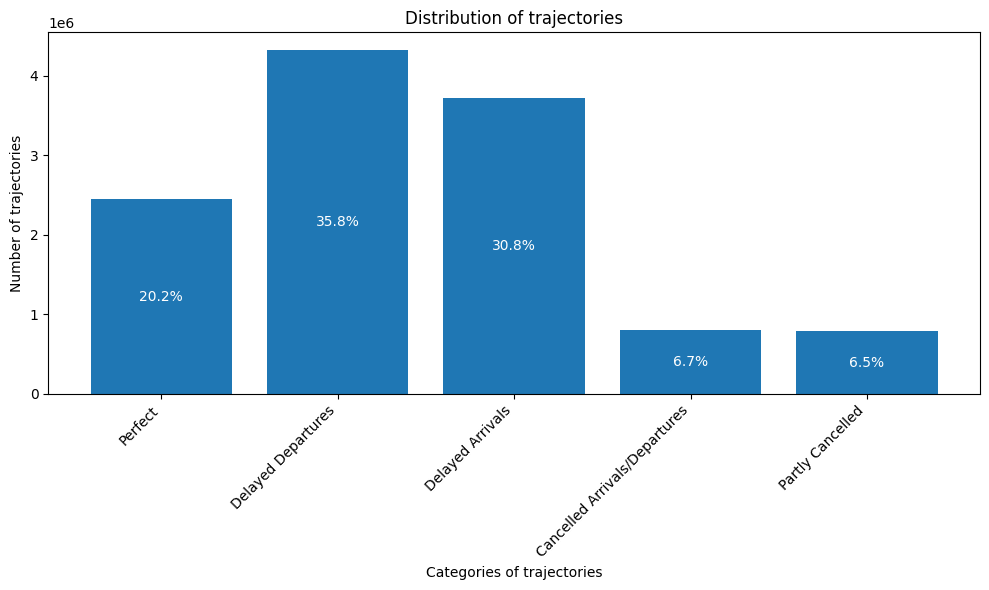

In [64]:
# Define categories and their counts
categories = ['Perfect', 'Delayed Departures', 'Delayed Arrivals','Cancelled Arrivals/Departures', 'Partly Cancelled']
counts = [num_perfect_trajectories, num_delayed_departures_trajectories, num_delayed_arrivals_trajectories, num_cancelled_trajectories, num_partly_cancelled_trajectories]

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, counts)

# Add labels and title
plt.xlabel('Categories of trajectories')
plt.ylabel('Number of trajectories')
plt.title('Distribution of trajectories')

# Add percentage labels inside the bars
total_trajectories = sum(counts)
for bar, count in zip(bars, counts):
    percentage = count / total_trajectories * 100
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'{percentage:.1f}%', 
             ha='center', va='center', color='white')

# Show plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plot
plt.show()

Let's create a csv file so we can use this dataframe for our model.

In [20]:
definite_df.to_csv('trajectories_IDs.csv', index=True)

In [19]:
definite_df

,RDT-ID,Trajectory,Date,Day of the Week,Maximum Delay,Arrival Delay of Last Stop,Nr. of Planned Stops,Nr. of Cancelled Arrivals,Nr. of Cancelled Departures,Nr. of Delayed Arrivals,Nr. of Delayed Departures,Partly Cancelled,YEAR,MONTH,DAY,DoW,ORIGIN,DESTINATION
Service:RDT-ID,,,,,,,,,,,,,,,,,,
738804,[738804],Rotterdam Centraal - Utrecht Centraal,2019-01-01,Tuesday,1,0.0,5,0,0,2,2,False,2019,1,1,Tuesday,Rotterdam Centraal,Utrecht Centraal
738805,[738805],Utrecht Centraal - Rotterdam Centraal,2019-01-01,Tuesday,2,0.0,6,0,0,2,1,False,2019,1,1,Tuesday,Utrecht Centraal,Rotterdam Centraal
738806,[738806],Rotterdam Centraal - Utrecht Centraal,2019-01-01,Tuesday,2,0.0,5,0,0,2,2,False,2019,1,1,Tuesday,Rotterdam Centraal,Utrecht Centraal
738807,[738807],Utrecht Centraal - Rotterdam Centraal,2019-01-01,Tuesday,2,2.0,5,0,0,2,0,False,2019,1,1,Tuesday,Utrecht Centraal,Rotterdam Centraal
738808,[738808],Rotterdam Centraal - Utrecht Centraal,2019-01-01,Tuesday,1,0.0,5,0,0,0,2,False,2019,1,1,Tuesday,Rotterdam Centraal,Utrecht Centraal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12703954,[12703954],Tiel - Leiden Centraal,2023-12-31,Sunday,10,4.0,12,2,2,10,11,True,2023,12,31,Sunday,Tiel,Leiden Centraal
12704321,[12704321],Uitgeest - Rotterdam Centraal,2023-12-31,Sunday,4,0.0,21,11,11,6,6,True,2023,12,31,Sunday,Uitgeest,Rotterdam Centraal
12704322,[12704322],Rotterdam Centraal - Uitgeest,2023-12-31,Sunday,1,0.0,21,15,15,1,1,True,2023,12,31,Sunday,Rotterdam Centraal,Uitgeest


I am curious how many times the last stop of a trajectory is actually canceled. We will need to decide what to do with those.

In [69]:
# Let's count the number of times that the last stop of the trajectory is cancelled 
# Filter the dataframe to get only the rows corresponding to the last stop of each trajectory where 'Stop:Arrival cancelled' is True
cancelled_last_stops = ns_data_definite.groupby('Service:RDT-ID').last()
cancelled_last_stops = cancelled_last_stops[cancelled_last_stops['Stop:Arrival cancelled'] == True]

# Count the number of times that the last stop of the trajectory was cancelled
num_cancelled_last_stop = len(cancelled_last_stops)
print(num_cancelled_last_stop)

615596


In [71]:
# Difference between Nr. of Cancelled Arrivals en Nr. of Cancelled Departures	
# Calculate the number of times the values are different
num_different = (definite_df['Nr. of Cancelled Arrivals'] != definite_df['Nr. of Cancelled Departures']).sum()
print("Number of times 'Nr. of Cancelled Arrivals' is different from 'Nr. of Cancelled Departures':", num_different)

Number of times 'Nr. of Cancelled Arrivals' is different from 'Nr. of Cancelled Departures': 24765


24765

We will need to know the percentage of trajectories with an arrival delay.

In [42]:
# Total number of trajectories
total_trajectories = len(definite_df)

# Number of trajectories with Arrival Delay of Last Stop greater than 0
delayed_countnan = definite_df['Arrival Delay of Last Stop'].isna().sum()
delayed_count0 = len(definite_df[definite_df['Arrival Delay of Last Stop'] == 0])
delayed_count1 = len(definite_df[(definite_df['Arrival Delay of Last Stop'] >= 1) & (definite_df['Arrival Delay of Last Stop'] <= 5)])
delayed_count2 = len(definite_df[(definite_df['Arrival Delay of Last Stop'] >= 6) & (definite_df['Arrival Delay of Last Stop'] <= 10)])
delayed_count10 = len(definite_df[definite_df['Arrival Delay of Last Stop'] > 10])

delayed_count00 = len(definite_df[definite_df['Arrival Delay of Last Stop'] > 0])


# Calculate the percentage
percentage_delayednan = (delayed_countnan / total_trajectories) * 100
percentage_delayed0 = (delayed_count0 / total_trajectories) * 100
percentage_delayed1 = (delayed_count1 / total_trajectories) * 100
percentage_delayed2 = (delayed_count2 / total_trajectories) * 100
percentage_delayed10 = (delayed_count10 / total_trajectories) * 100

percentage_delayed00 = (delayed_count00 / total_trajectories) * 100

print("Percentage of trajectories with last stop canceled", round(percentage_delayednan, 2), "%")
print("Percentage of trajectories with an arrival delay of the last stop exacly 0 minutes:", round(percentage_delayed0, 2), "%")
print("Percentage of trajectories with an arrival delay of the last stop greater than 1 minute and less than 5 minutes:", round(percentage_delayed1, 2), "%")
print("Percentage of trajectories with an arrival delay of the last stop greater than 6 minutes and less than 11 minutes:", round(percentage_delayed2, 2), "%")
print("Percentage of trajectories with an arrival delay of the last stop greater than 10 minutes:", round(percentage_delayed10, 2), "%")

print("Percentage of trajectories with an arrival delay of the last stop greater than 0 minutes:", round(percentage_delayed00, 2), "%")

Percentage of trajectories with last stop canceled 6.53 %
Percentage of trajectories with an arrival delay of the last stop exacly 0 minutes: 72.96 %
Percentage of trajectories with an arrival delay of the last stop greater than 1 minute and less than 5 minutes: 17.02 %
Percentage of trajectories with an arrival delay of the last stop greater than 6 minutes and less than 11 minutes: 1.95 %
Percentage of trajectories with an arrival delay of the last stop greater than 10 minutes: 1.54 %
Percentage of trajectories with an arrival delay of the last stop greater than 0 minutes: 20.51 %


In [76]:
# Number of trajectories with Arrival Delay of Last Stop equal to 0
zero_delay_count = len(definite_df[definite_df['Arrival Delay of Last Stop'] == 0])

# Number of trajectories with Arrival Delay of Last Stop between 1-5 minutes
delay_1_to_5_count = len(definite_df[(definite_df['Arrival Delay of Last Stop'] >= 1) & (definite_df['Arrival Delay of Last Stop'] <= 5)])

# Number of trajectories with Arrival Delay of Last Stop between 6-10 minutes
delay_6_to_10_count = len(definite_df[(definite_df['Arrival Delay of Last Stop'] >= 6) & (definite_df['Arrival Delay of Last Stop'] <= 10)])

# Number of trajectories with Arrival Delay of Last Stop more than 10 minutes
delay_more_than_10_count = len(definite_df[definite_df['Arrival Delay of Last Stop'] > 10])

print("Number of trajectories with Arrival Delay of Last Stop equal to 0:", zero_delay_count)
print("Number of trajectories with Arrival Delay of Last Stop between 1-5 minutes:", delay_1_to_5_count)
print("Number of trajectories with Arrival Delay of Last Stop between 6-10 minutes:", delay_6_to_10_count)
print("Number of trajectories with Arrival Delay of Last Stop more than 10 minutes:", delay_more_than_10_count)

total = zero_delay_count + delay_1_to_5_count + delay_6_to_10_count + delay_more_than_10_count
left = (len((definite_df)) - total)
print("Number or remaining trajectories:", left)

num_nan_delays = definite_df['Arrival Delay of Last Stop'].isna().sum()
print("Number of NaN values in 'Arrival Delay of Last Stop':", num_nan_delays)

Number of trajectories with Arrival Delay of Last Stop equal to 0: 5551906
Number of trajectories with Arrival Delay of Last Stop between 1-5 minutes: 1295064
Number of trajectories with Arrival Delay of Last Stop between 6-10 minutes: 148215
Number of trajectories with Arrival Delay of Last Stop more than 10 minutes: 117325
Number or remaining trajectories: 497166
Number of NaN values in 'Arrival Delay of Last Stop': 497044


In [78]:
nan_delay_rows = definite_df[definite_df['Arrival Delay of Last Stop'].isna()]
nan_delay_rows

,RDT-ID,Trajectory,Date,Day of the Week,Maximum Delay,Arrival Delay of Last Stop,Nr. of Planned Stops,Nr. of Cancelled Arrivals,Nr. of Cancelled Departures,Nr. of Delayed Arrivals,Nr. of Delayed Departures,Partly Cancelled
Service:RDT-ID,,,,,,,,,,,,
739002,[739002],Rotterdam Centraal - Amsterdam Centraal,2019-01-01,Tuesday,0,NaN,1,2,2,0,0,True
739153,[739153],'s-Hertogenbosch - Roosendaal,2019-01-01,Tuesday,0,NaN,3,4,4,0,0,True
739945,[739945],Den Haag Centraal - Eindhoven,2019-01-01,Tuesday,0,NaN,5,6,6,0,0,True
740499,[740499],Eindhoven - Den Haag Centraal,2019-01-01,Tuesday,0,NaN,5,6,6,0,0,True
744021,[744021],Leiden Centraal - Alphen a/d Rijn,2019-01-02,Wednesday,0,NaN,1,2,2,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
12700226,[12700226],Amsterdam Centraal - Vlissingen,2023-12-30,Saturday,0,NaN,21,22,22,0,0,True
12700229,[12700229],Dordrecht - Den Haag Centraal,2023-12-30,Saturday,0,NaN,12,13,13,0,0,True
12700230,[12700230],Den Haag Centraal - Dordrecht,2023-12-30,Saturday,0,NaN,12,13,13,0,0,True


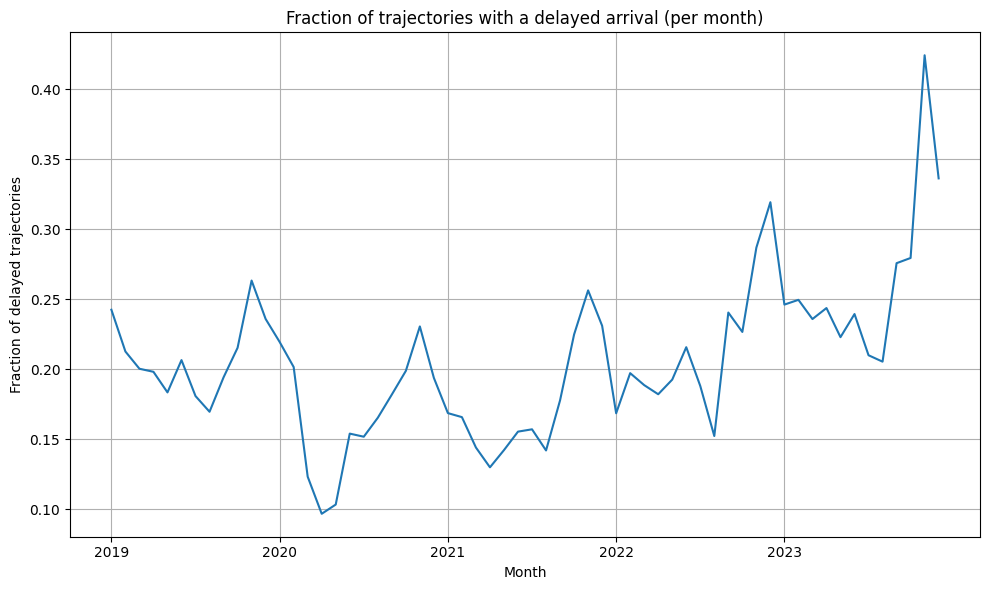

In [17]:
# Convert 'Date' column to datetime format
definite_df['Date'] = pd.to_datetime(definite_df['Date'])

# Extract year and month from the datetime column
definite_df['Year'] = definite_df['Date'].dt.year
definite_df['Month'] = definite_df['Date'].dt.month

# Filter the data for delayed edges (arrival delay of last stop > 0)
delayed_edges = definite_df[definite_df['Arrival Delay of Last Stop'] > 0]

# Group the data by year and month, and count the number of trajectories with delayed edges for each month
delayed_counts = delayed_edges.groupby(['Year', 'Month']).size()

# Calculate the total number of trajectories for each month
total_counts = definite_df.groupby(['Year', 'Month']).size()

# Calculate the percentage of delayed trajectories compared to the total trajectories for each month
percentage_delayed = (delayed_counts / total_counts)

# Reset index to convert MultiIndex to columns
percentage_delayed = percentage_delayed.reset_index()

# Plot the percentages for delayed trajectories
plt.figure(figsize=(10, 6))
plt.plot(range(len(percentage_delayed)), percentage_delayed[0], linestyle='-')
plt.xlabel('Month')
plt.ylabel('Fraction of delayed trajectories')
plt.title('Fraction of trajectories with a delayed arrival (per month)')

# Set x-axis ticks to display years
tick_positions = percentage_delayed.index[::12]    # Show ticks every 12 months (i.e., each year)
tick_labels = percentage_delayed['Year'].unique()  # Use unique years as tick labels
plt.xticks(tick_positions, tick_labels)

plt.grid(True)
plt.tight_layout()
plt.show()


#### Look for timeframe

In this section we will look for the most appropriate timeframe to use.

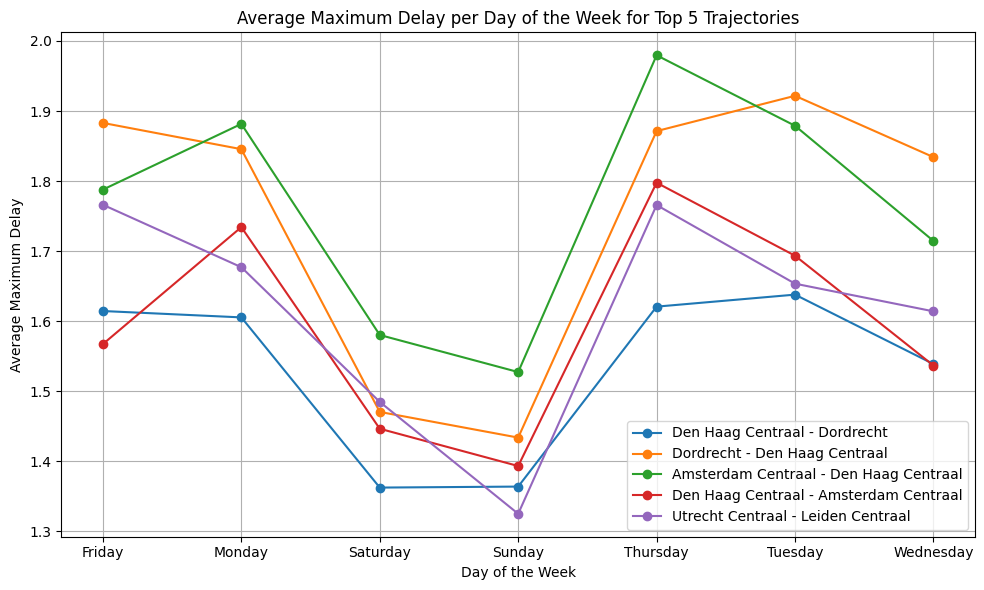

In [14]:
# Find the top 5 most counted trajectories
top_5_trajectories = new_df['Trajectory'].value_counts().head(5).index

# Initialize a dictionary to store the average maximum delay per day of the week for each trajectory
avg_max_delay_per_day = {trajectory: {} for trajectory in top_5_trajectories}

# Calculate the average maximum delay per day of the week for each trajectory
for trajectory in top_5_trajectories:
    # Filter the DataFrame for the current trajectory
    trajectory_data = new_df[new_df['Trajectory'] == trajectory]
    # Group by day of the week and calculate the average maximum delay
    avg_delay = trajectory_data.groupby('Day of the Week')['Maximum Delay'].mean()
    # Store the averages in the dictionary
    avg_max_delay_per_day[trajectory] = avg_delay

# Plot the average maximum delay per day of the week for each trajectory
plt.figure(figsize=(10, 6))
for trajectory, avg_delay in avg_max_delay_per_day.items():
    plt.plot(avg_delay.index, avg_delay.values, marker='o', label=trajectory)

plt.xlabel('Day of the Week')
plt.ylabel('Average Maximum Delay')
plt.title('Average Maximum Delay per Day of the Week for Top 5 Trajectories')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/3g/j8k6m66124x5lcy646zpdz680000gn/T/ipykernel_41678/4003164858.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trajectory_data['Day of the Month'] = pd.to_datetime(trajectory_data['Date of the Trajectory']).dt.day
/var/folders/3g/j8k6m66124x5lcy646zpdz680000gn/T/ipykernel_41678/4003164858.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trajectory_data['Day of the Month'] = pd.to_datetime(trajectory_data['Date of the Trajectory']).dt.day
/var/folders/3g/j8k6m66124x5lcy646zpdz680000gn/T

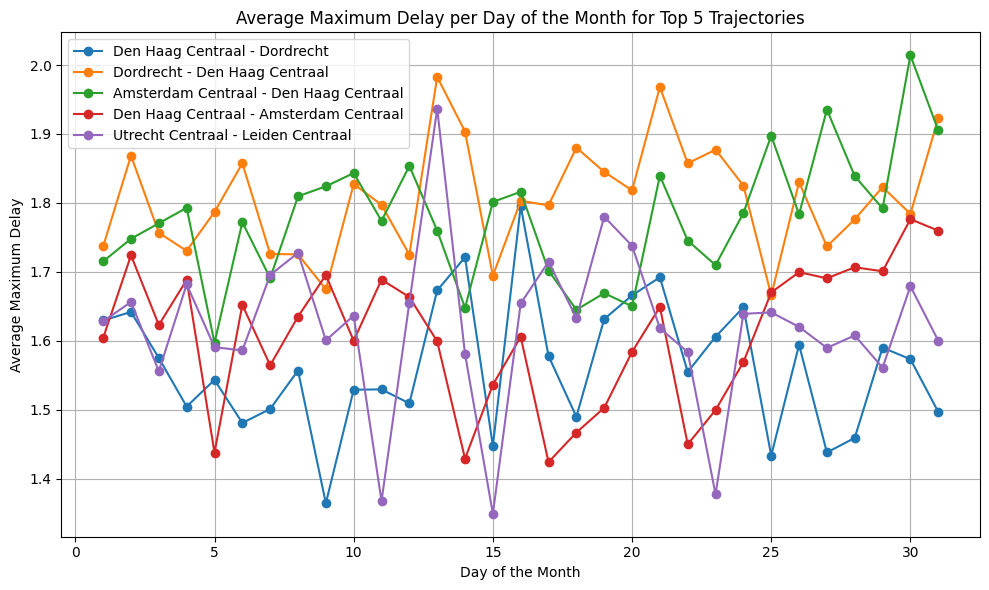

In [15]:
# Find the top 5 most counted trajectories
top_5_trajectories = new_df['Trajectory'].value_counts().head(5).index

# Initialize a dictionary to store the average maximum delay per day of the month for each trajectory
avg_max_delay_per_day_of_month = {trajectory: {} for trajectory in top_5_trajectories}

# Calculate the average maximum delay per day of the month for each trajectory
for trajectory in top_5_trajectories:
    # Filter the DataFrame for the current trajectory
    trajectory_data = new_df[new_df['Trajectory'] == trajectory]
    # Extract the day of the month from the date
    trajectory_data['Day of the Month'] = pd.to_datetime(trajectory_data['Date of the Trajectory']).dt.day
    # Group by day of the month and calculate the average maximum delay
    avg_delay = trajectory_data.groupby('Day of the Month')['Maximum Delay'].mean()
    # Store the averages in the dictionary
    avg_max_delay_per_day_of_month[trajectory] = avg_delay

# Plot the average maximum delay per day of the month for each trajectory
plt.figure(figsize=(10, 6))
for trajectory, avg_delay in avg_max_delay_per_day_of_month.items():
    plt.plot(avg_delay.index, avg_delay.values, marker='o', label=trajectory)

plt.xlabel('Day of the Month')
plt.ylabel('Average Maximum Delay')
plt.title('Average Maximum Delay per Day of the Month for Top 5 Trajectories')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/3g/j8k6m66124x5lcy646zpdz680000gn/T/ipykernel_41678/3313364169.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trajectory_data['Month'] = pd.to_datetime(trajectory_data['Date of the Trajectory']).dt.month
/var/folders/3g/j8k6m66124x5lcy646zpdz680000gn/T/ipykernel_41678/3313364169.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trajectory_data['Month'] = pd.to_datetime(trajectory_data['Date of the Trajectory']).dt.month
/var/folders/3g/j8k6m66124x5lcy646zpdz680000gn/T/ipykernel_41678/3

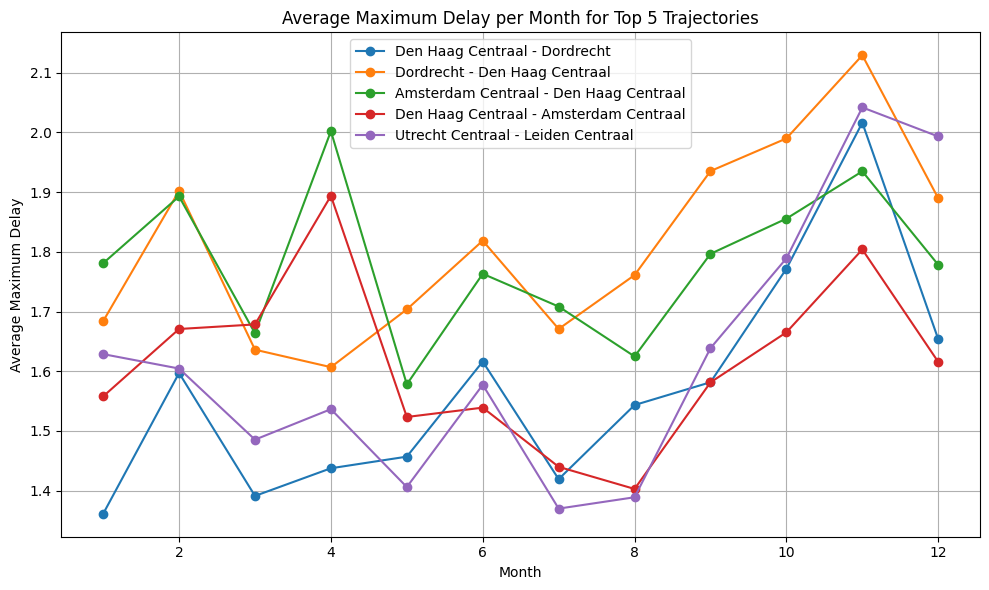

In [16]:
# Find the top 5 most counted trajectories
top_5_trajectories = new_df['Trajectory'].value_counts().head(5).index

# Initialize a dictionary to store the average maximum delay per month for each trajectory
avg_max_delay_per_month = {trajectory: {} for trajectory in top_5_trajectories}

# Calculate the average maximum delay per month for each trajectory
for trajectory in top_5_trajectories:
    # Filter the DataFrame for the current trajectory
    trajectory_data = new_df[new_df['Trajectory'] == trajectory]
    # Extract the month from the date
    trajectory_data['Month'] = pd.to_datetime(trajectory_data['Date of the Trajectory']).dt.month
    # Group by month and calculate the average maximum delay
    avg_delay = trajectory_data.groupby('Month')['Maximum Delay'].mean()
    # Store the averages in the dictionary
    avg_max_delay_per_month[trajectory] = avg_delay

# Plot the average maximum delay per month for each trajectory
plt.figure(figsize=(10, 6))
for trajectory, avg_delay in avg_max_delay_per_month.items():
    plt.plot(avg_delay.index, avg_delay.values, marker='o', label=trajectory)

plt.xlabel('Month')
plt.ylabel('Average Maximum Delay')
plt.title('Average Maximum Delay per Month for Top 5 Trajectories')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

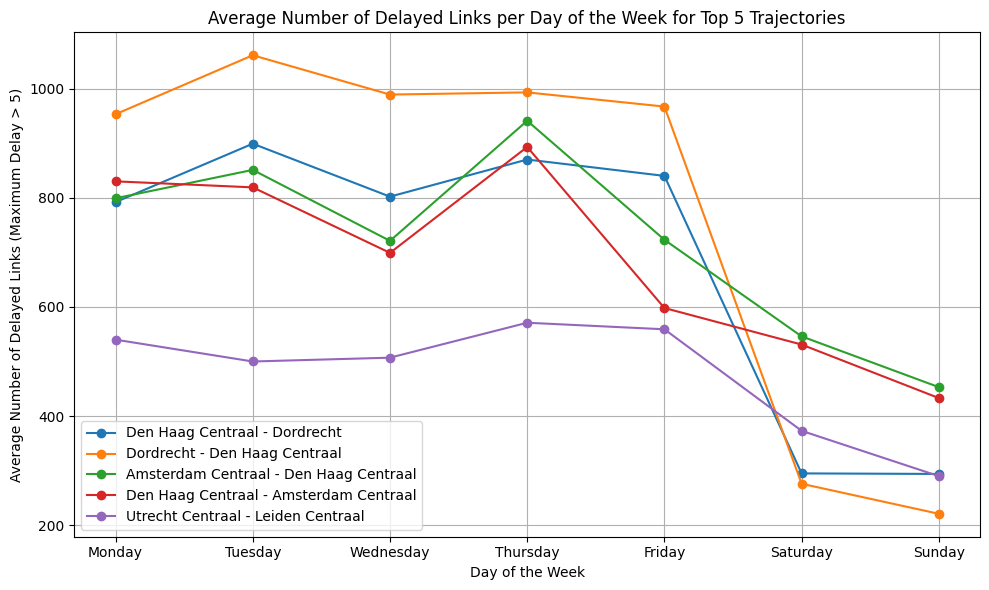

In [29]:
from pandas.api.types import CategoricalDtype

# Find the top 5 most counted trajectories
top_5_trajectories = new_df['Trajectory'].value_counts().head(5).index

# Initialize a dictionary to store the average number of delayed links per day of the week for each trajectory
avg_delayed_links_per_day = {trajectory: {} for trajectory in top_5_trajectories}

# Define the order of the days of the week
days_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert the 'Day of the Week' column to a categorical data type with the specified order
new_df['Day of the Week'] = new_df['Day of the Week'].astype(CategoricalDtype(categories=days_of_week_order, ordered=True))

# Calculate the average number of delayed links per day of the week for each trajectory
for trajectory in top_5_trajectories:
    # Filter the DataFrame for the current trajectory and where Maximum Delay is greater than 0
    trajectory_data = new_df[(new_df['Trajectory'] == trajectory) & (new_df['Maximum Delay'] > 5)]
    # Group by day of the week and count the number of rows in each group
    avg_delayed_links = trajectory_data.groupby('Day of the Week').size()
    # Store the counts in the dictionary
    avg_delayed_links_per_day[trajectory] = avg_delayed_links
    
# Plot the average number of delayed links per day of the week for each trajectory
plt.figure(figsize=(10, 6))
for trajectory, avg_delayed_links in avg_delayed_links_per_day.items():
    plt.plot(avg_delayed_links.index, avg_delayed_links.values, marker='o', label=trajectory)

plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Delayed Links (maximum delay > 5 minutes)')
plt.title('Average Number of Delayed Links per Day of the Week for Top 5 Trajectories')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Create Distance Map

In [33]:
# STEP 1: Get distances for codes
# Load the matrix from the CSV file into a pandas DataFrame
matrix_df = pd.read_csv('tariff-distances-2022-01.csv', index_col=0, delimiter=';')

# Initialize empty lists to store the data for the new DataFrame
origin_codes = []
destination_codes = []
distances = []

# Iterate over the index (station codes) of the original DataFrame
for origin_code in matrix_df.index:
    # Iterate over the columns (station codes) of the original DataFrame
    for destination_code in matrix_df.columns:
        # Extract the distance value from the original DataFrame
        distance = matrix_df.loc[origin_code, destination_code]
        # Check if the distance is not 'XXX' and the origin and destination are not the same
        if distance != 'XXX' and origin_code != destination_code:
            # Append the values to the respective lists
            origin_codes.append(origin_code)
            destination_codes.append(destination_code)
            distances.append(distance)

# Create a new DataFrame from the lists
new_df = pd.DataFrame({
    'origin_code': origin_codes,
    'destination_code': destination_codes,
    'distance': distances
})

# Display the new DataFrame
new_df

,origin_code,destination_code,distance
0,AC,AH,82
1,AC,AHP,83
2,AC,AHPR,85
3,AC,AHZ,90
4,AC,AKL,71
...,...,...,...
158797,ZZS,ZTMO,81
158798,ZZS,ZV,123
158799,ZZS,ZVB,134
158800,ZZS,ZVT,32


In [34]:
# STEP 2: Let's change the codes to names
# Load the station-2023.csv file into a DataFrame
station_df = pd.read_csv('stations-2023-09.csv')

# Create a dictionary mapping station codes to names
code_to_name = dict(zip(station_df['code'], station_df['name_long']))

# Assuming your DataFrame is named new_df
# Create a new DataFrame with station names instead of codes
newer_df = new_df.copy()  # Create a copy of new_df to avoid modifying the original DataFrame
newer_df['origin_name'] = new_df['origin_code'].map(code_to_name)
newer_df['destination_name'] = new_df['destination_code'].map(code_to_name)

# Drop the origin_code and destination_code columns
newer_df.drop(['origin_code', 'destination_code'], axis=1, inplace=True)
newer_df = newer_df[['origin_name', 'destination_name', 'distance']]
newer_df

,origin_name,destination_name,distance
0,Abcoude,Arnhem Centraal,82
1,Abcoude,Arnhem Velperpoort,83
2,Abcoude,Arnhem Presikhaaf,85
3,Abcoude,Arnhem Zuid,90
4,Abcoude,Arkel,71
...,...,...,...
158797,Zaandijk Zaanse Schans,Zoetermeer Oost,81
158798,Zaandijk Zaanse Schans,Zevenaar,123
158799,Zaandijk Zaanse Schans,Zevenbergen,134
158800,Zaandijk Zaanse Schans,Zandvoort aan Zee,32


We need to manually change "Amersfoort" to "Amersfoort Centraal" and "Eindhoven" to "Eindhoven Centraal". I observed that these stations were called by two different names and learned that the reason for this is that they only became "Centraal" stations later. They are Central stations since 2019 though so it makes sense to change the names. Link: https://www.maxvakantieman.nl/artikelen/eropuit-in-nederland/wanneer-mag-een-treinstation-de-naam-centraal-station-dragen/#:~:text=Sinds%202019%20bestaan%20er%20in,en%20Rotterdam%20aan%20de%20eisen.

In [45]:
# STEP 3: Additional Modifications
# Update specific station names
newer_df2 = newer_df.copy()  # Create a copy to avoid modifying the original DataFrame
newer_df2['origin_name'] = newer_df2['origin_name'].replace({'Amersfoort': 'Amersfoort Centraal', 'Eindhoven': 'Eindhoven Centraal'})
newer_df2['destination_name'] = newer_df2['destination_name'].replace({'Amersfoort': 'Amersfoort Centraal', 'Eindhoven': 'Eindhoven Centraal'})
newer_df2

,origin_name,destination_name,distance
0,Abcoude,Arnhem Centraal,82
1,Abcoude,Arnhem Velperpoort,83
2,Abcoude,Arnhem Presikhaaf,85
3,Abcoude,Arnhem Zuid,90
4,Abcoude,Arkel,71
...,...,...,...
158797,Zaandijk Zaanse Schans,Zoetermeer Oost,81
158798,Zaandijk Zaanse Schans,Zevenaar,123
158799,Zaandijk Zaanse Schans,Zevenbergen,134
158800,Zaandijk Zaanse Schans,Zandvoort aan Zee,32


The csv created in the codeblock below is the correct one.

In [47]:
newer_df2.to_csv('station_distances.csv')

In [35]:
# # STEP 2a: Find all unique values from both 'ORIGIN' and 'DESTINATION' columns in def_trajectories
# unique_origin = trajectories_per_day['ORIGIN'].unique()
# unique_destination = trajectories_per_day['DESTINATION'].unique()
# X = np.unique(np.concatenate([unique_origin, unique_destination]))

# # STEP 2b: Change the codes to names and filter for cities from the Netherlands
# station_df = pd.read_csv('stations-2023-09.csv')
# nl_stations = station_df[station_df['country'] == 'NL']
# code_to_name = dict(zip(nl_stations['code'], nl_stations['name_long']))

# # Assuming newer_df is already created as per my previous code
# newer_df = newer_df[newer_df['origin_name'].isin(code_to_name.values()) & newer_df['destination_name'].isin(code_to_name.values())]

# # Filter trajectories_per_day for cities from the Netherlands
# definite_trajectories = trajectories_per_day[trajectories_per_day['ORIGIN'].isin(code_to_name.values()) & trajectories_per_day['DESTINATION'].isin(code_to_name.values())]

In [36]:
# # STEP 3: Get the trajectories from the main dataframe
# # Merge def_trajectories with newer_df on 'origin_name' and 'destination_name'
# merged_df = pd.merge(trajectories_per_day, newer_df, left_on=['ORIGIN', 'DESTINATION'], right_on=['origin_name', 'destination_name'], how='left')

# # Drop duplicate rows in case there are any
# merged_df.drop_duplicates(subset=['ORIGIN', 'DESTINATION'], inplace=True)

# # Initialize 'weight' column to 0.0
# merged_df['weight'] = 0.0

# # Create newest_df with unique combinations of ORIGIN and DESTINATION and their corresponding distances
# newest_df = merged_df[['ORIGIN', 'DESTINATION', 'weight', 'distance']].copy()
# newest_df

,ORIGIN,DESTINATION,weight,distance
0,'s-Hertogenbosch,Arnhem Centraal,0.0,62
1,'s-Hertogenbosch,Den Haag Centraal,0.0,108
2,'s-Hertogenbosch,Deurne,0.0,54
3,'s-Hertogenbosch,Dordrecht,0.0,71
4,'s-Hertogenbosch,Eindhoven,0.0,NaN
...,...,...,...,...
502986,Amsterdam Amstel,Diemen,0.0,5
503052,Diemen,Diemen Zuid,0.0,9
503053,Diemen Zuid,Diemen,0.0,9
504384,Capelle Schollevaar,Rotterdam Centraal,0.0,11


In [37]:
# How many NaN values are there?
NANS = newest_df['distance'].isna().sum()
NANS

392

In [38]:
# Let's create a CSV file for our station distances
newest_df.to_csv('station_distances.csv', index=False)

#### Create Population Map

In [22]:
# Get unique values from the 'ORIGIN' and 'DESTINATION' columns separately
unique_origin = def_trajectories['ORIGIN'].unique()
unique_destination = def_trajectories['DESTINATION'].unique()

# Concatenate the unique values from both columns
unique_stations = np.unique(np.concatenate([unique_origin, unique_destination]))
unique_stations

array(["'s-Hertogenbosch", "'s-Hertogenbosch Oost", "'t Harde",
       'Aachen Hbf', 'Abcoude', 'Akkrum', 'Alkmaar', 'Alkmaar Noord',
       'Almelo', 'Almelo de Riet', 'Almere Buiten', 'Almere Centrum',
       'Almere Muziekwijk', 'Almere Oostvaarders', 'Almere Poort',
       'Alphen a/d Rijn', 'Amersfoort', 'Amersfoort Centraal',
       'Amersfoort Schothorst', 'Amersfoort Vathorst', 'Amsterdam Amstel',
       'Amsterdam Bijlmer ArenA', 'Amsterdam Centraal',
       'Amsterdam Holendrecht', 'Amsterdam Lelylaan',
       'Amsterdam Muiderpoort', 'Amsterdam Noord Metro', 'Amsterdam RAI',
       'Amsterdam Science Park', 'Amsterdam Sloterdijk', 'Amsterdam Zuid',
       'Anna Paulowna', 'Antwerpen-Berchem', 'Antwerpen-Centraal',
       'Antwerpen-Noorderdokken', 'Apeldoorn', 'Apeldoorn Osseveld',
       'Arkel', 'Arnemuiden', 'Arnhem Centraal', 'Arnhem Presikhaaf',
       'Arnhem Velperpoort', 'Arnhem Zuid', 'Assen', 'Baarn',
       'Bad Bentheim', 'Baflo', 'Barendrecht', 'Barneveld Centru

In [24]:
population_regions = pd.read_csv('population-nl-2023.csv', index_col=0, delimiter=';')
population_regions

,Inwonersaantal
Regio,
Aa en Hunze,25853.0
Aalburg,NaN
Aalsmeer,33354.0
Aalten,27308.0
Ter Aar,NaN
...,...
Zundert,22545.0
Zutphen,48746.0
Zwartewaterland,23447.0


In [27]:
from fuzzywuzzy import process

# Normalize station names in unique_stations
unique_stations_normalized = [station.lower().replace("'", "") for station in unique_stations]

# Normalize region names in population_regions
population_regions['Normalized Region'] = population_regions.index.str.lower().str.replace("'", "")

# Initialize an empty list to store population data for stations
population = []

# Normalize the index of the population_regions dataframe
population_regions.index = population_regions.index.str.lower().str.replace("'", "")

# Perform fuzzy matching between the normalized station names and the population regions
for station in unique_stations_normalized:
    # Find the closest match to the normalized station name in the population regions
    match = process.extractOne(station, population_regions.index)
    
    # If a match is found and the similarity score is above a certain threshold (e.g., 80)
    if match[1] > 70:
        # Get the population value for the matched region
        population_value = population_regions.loc[match[0], 'Inwonersaantal']
        population.append(population_value)
        print(f"Station: {station}, Population: {population_value}")
    else:
        population.append(None)
        print(f"No match found for station: {station}")

# Create dataframe from population_data
population_stations_nl = pd.DataFrame({'Station': unique_stations, 'Population': population})

# Display the dataframe
population_stations_nl

Station: s-hertogenbosch, Population: 160740.0
Station: s-hertogenbosch oost, Population: 160740.0
No match found for station: t harde
No match found for station: aachen hbf
Station: abcoude, Population: nan
Station: akkrum, Population: nan
Station: alkmaar, Population: 112311.0
Station: alkmaar noord, Population: 112311.0
Station: almelo, Population: 74355.0
Station: almelo de riet, Population: 74355.0
Station: almere buiten, Population: 226630.0
Station: almere centrum, Population: 226630.0
Station: almere muziekwijk, Population: 226630.0
Station: almere oostvaarders, Population: 226630.0
Station: almere poort, Population: 226630.0
Station: alphen a/d rijn, Population: 114968.0
Station: amersfoort, Population: 161825.0
Station: amersfoort centraal, Population: 161825.0
Station: amersfoort schothorst, Population: 161825.0
Station: amersfoort vathorst, Population: 161825.0
Station: amsterdam amstel, Population: 934927.0
Station: amsterdam bijlmer arena, Population: 934927.0
Station: am

,Station,Population
0,'s-Hertogenbosch,160740.0
1,'s-Hertogenbosch Oost,160740.0
2,'t Harde,NaN
3,Aachen Hbf,NaN
4,Abcoude,NaN
...,...,...
340,Zoetermeer Oost,128424.0
341,Zuidhorn,NaN
342,Zutphen,48746.0
343,Zwijndrecht,44870.0


A lot of NaN values, should be adjusted/manually updated later.

In [26]:
nans = population_stations_nl.isna().sum()
print(nans)

Station         0
Population    140
dtype: int64


In [29]:
population_stations_nl[population_stations_nl['Population'].isna()]
population_stations_nl.to_csv("population_stations.csv")

In [220]:
population_stations_nl.to_csv("population_stations_nl.csv", index=False)

## Part 4: Data Evaluation <a name="part-4:-data-analysis"></a>

### Service Data <a name="3a.-service-data"></a>

#### Display

Let's start to display the first few lines of the service dataset.

In [6]:
# Display the first few lines of the combined dataframe
print("First few lines:")
print(combined_df_service.head())

First few lines:
   Service:RDT-ID Service:Date Service:Type Service:Company  \
0          738804   2019-01-01    Intercity              NS   
1          738804   2019-01-01    Intercity              NS   
2          738804   2019-01-01    Intercity              NS   
3          738804   2019-01-01    Intercity              NS   
4          738804   2019-01-01    Intercity              NS   

   Service:Train number  Service:Completely cancelled  \
0                  1410                         False   
1                  1410                         False   
2                  1410                         False   
3                  1410                         False   
4                  1410                         False   

   Service:Partly cancelled  Service:Maximum delay  Stop:RDT-ID  \
0                     False                      1      6220112   
1                     False                      0      6220116   
2                     False                      0      6220

In [7]:
# Display the columns of the service dataset

# Shows the columns of the disruptions data, their counts and the data type
print(combined_df_service.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108092099 entries, 0 to 108092098
Data columns (total 18 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Service:RDT-ID                int64  
 1   Service:Date                  object 
 2   Service:Type                  object 
 3   Service:Company               object 
 4   Service:Train number          int64  
 5   Service:Completely cancelled  bool   
 6   Service:Partly cancelled      bool   
 7   Service:Maximum delay         int64  
 8   Stop:RDT-ID                   int64  
 9   Stop:Station code             object 
 10  Stop:Station name             object 
 11  Stop:Arrival time             object 
 12  Stop:Arrival delay            float64
 13  Stop:Arrival cancelled        object 
 14  Stop:Departure time           object 
 15  Stop:Departure delay          float64
 16  Stop:Departure cancelled      object 
 17  Year                          object 
dtypes: bool(2), float6

#### General Distribution <a name="3a1.-general-distribution"></a>

Let's see what the general distribution of datapoints looks like for the service data.

In [8]:
# Count the number of data points for each year & the total
year_counts_service = combined_df_service['Year'].value_counts()
year_counts_sorted_service = year_counts_service.sort_index()
total_data_points_service = year_counts_service.sum()

# Print the counts for each year & the total
print("Year\t\tData Points")
print("-----------------------------")
for year, count in year_counts_sorted_service.items():
    print(f"{year}\t\t{count}")
print("-----------------------------")
print("Total Data Points for All Years:", total_data_points_service)

Year		Data Points
-----------------------------
2019		20773804
2020		22235137
2021		21818011
2022		22025754
2023		21239393
-----------------------------
Total Data Points for All Years: 108092099


Since there are more than 108 million lines I will only consider the trajectories for now and not the in between stops. 

In the cell below I will define the beginning and the end of a line by looking at the first mention of the ID and the last mention of the ID.

In [9]:
# Create a Dataframe for the number of lines per day (no in between stops)

# Identify beginnings and ends of trajectories
beginnings = combined_df_service.groupby('Service:RDT-ID').first().reset_index()
ends = combined_df_service.groupby('Service:RDT-ID').last().reset_index()

# Merge beginnings and ends to find complete trajectories
trajectories = pd.merge(beginnings[['Service:RDT-ID', 'Service:Date']], 
                        ends[['Service:RDT-ID', 'Service:Date']], 
                        on=['Service:RDT-ID', 'Service:Date'])

# Count trajectories per day and year
trajectories_per_day = trajectories.groupby('Service:Date').size().reset_index(name='Nr. of Trajectories')

# Print or use the trajectories_per_day DataFrame as needed
print(trajectories_per_day)

     Service:Date  Nr. of Trajectories
0      2019-01-01                 4735
1      2019-01-02                 6422
2      2019-01-03                 6437
3      2019-01-04                 6476
4      2019-01-05                 5490
...           ...                  ...
1821   2023-12-27                 5916
1822   2023-12-28                 5982
1823   2023-12-29                 6177
1824   2023-12-30                 5217
1825   2023-12-31                 3538

[1826 rows x 2 columns]


I will compare the number of trajectories with the approximate number of rides below to see the numbers of datapoints we are dealing with.

In [10]:
# Count trajectories per day and year
rides_per_day = combined_df_service.groupby('Service:Date').size().reset_index(name='Approx. Nr. of Rides')

# Merge trajectories_per_day and rides_per_day DataFrames on 'Service:Date' column
combined_data = pd.merge(trajectories_per_day, rides_per_day, on='Service:Date', how='outer')

# Print the merged DataFrame
print(combined_data)

     Service:Date  Nr. of Trajectories  Approx. Nr. of Rides
0      2019-01-01                 4735                 43508
1      2019-01-02                 6422                 58695
2      2019-01-03                 6437                 58715
3      2019-01-04                 6476                 59003
4      2019-01-05                 5490                 50084
...           ...                  ...                   ...
1821   2023-12-27                 5916                 58605
1822   2023-12-28                 5982                 59318
1823   2023-12-29                 6177                 60325
1824   2023-12-30                 5217                 51961
1825   2023-12-31                 3538                 34742

[1826 rows x 3 columns]


Above, we see again that there are a lot of rides per day (this includes the intermediate stops). For this reason we will look at the trajectories instead of all the rides, and not consider the intermediate stops for now.

Let's now visualize the distribution of the number of trajectories per year.

In [76]:
# Number of trajectories per month for all years

# Convert 'Service:Date' column to datetime format
trajectories_per_day['Service:Date'] = pd.to_datetime(trajectories_per_day['Service:Date'])

# Extract year and month from 'Service:Date'
trajectories_per_day['Year'] = trajectories_per_day['Service:Date'].dt.year
trajectories_per_day['Month'] = trajectories_per_day['Service:Date'].dt.month
trajectories_per_day['Day'] = trajectories_per_day['Service:Date'].dt.dayofyear  

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Nr. of Trajectories', hue='Year', data=trajectories_per_day, palette='Set1')
plt.title('Average number of trajectories per Month')
plt.xlabel('Month')
plt.ylabel('Number of Trajectories')
plt.xticks(ticks=range(1, 13), labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.show()

NameError: name 'trajectories_per_day' is not defined

What kind of trend will we see if we plot all years next to each other isntead of over each other? Can we see big differences for COVID?

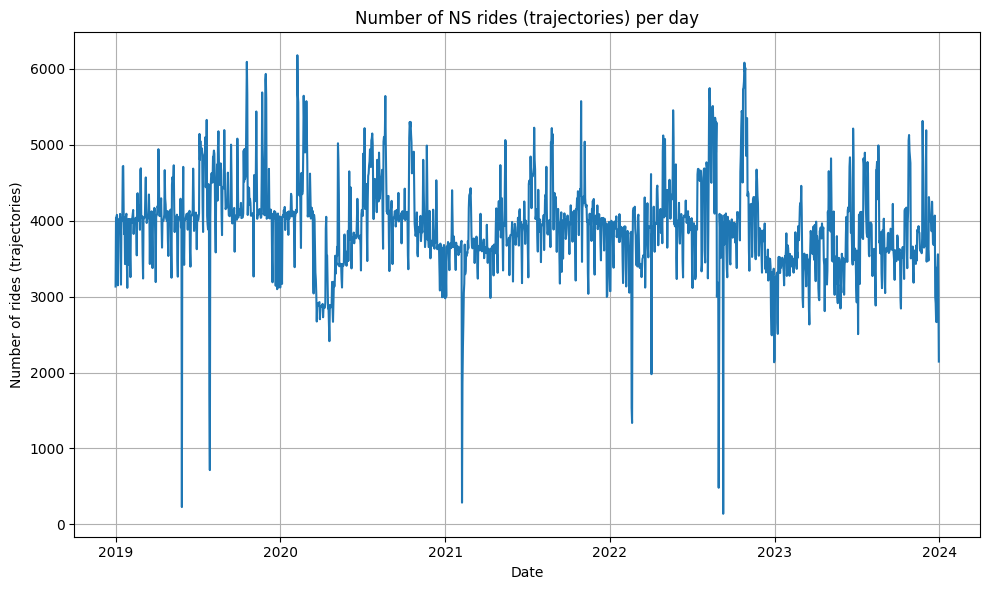

In [20]:
# Group the DataFrame by 'Date' and count the number of trajectories for each day
rides_per_day = definite_df.groupby('Date').size()

# Plot the number of rides per day
plt.figure(figsize=(10, 6))
plt.plot(rides_per_day.index, rides_per_day.values, linestyle='-')
plt.xlabel('Date')
plt.ylabel('Number of rides (trajectories)')
plt.title('Number of NS rides (trajectories) per day')
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
rides_per_day.mean()

3930.076122672508

We can not necessarily see a difference in trend during COVID years (feb 2020-feb 2022). That's interesting and  good as well since this is also the case for the missing links in our baseline article. These missing links can still be predicted during COVID years because their share relative to the total does not change. 

Let us zoom into one of the years if we can discover some kind of trend there.

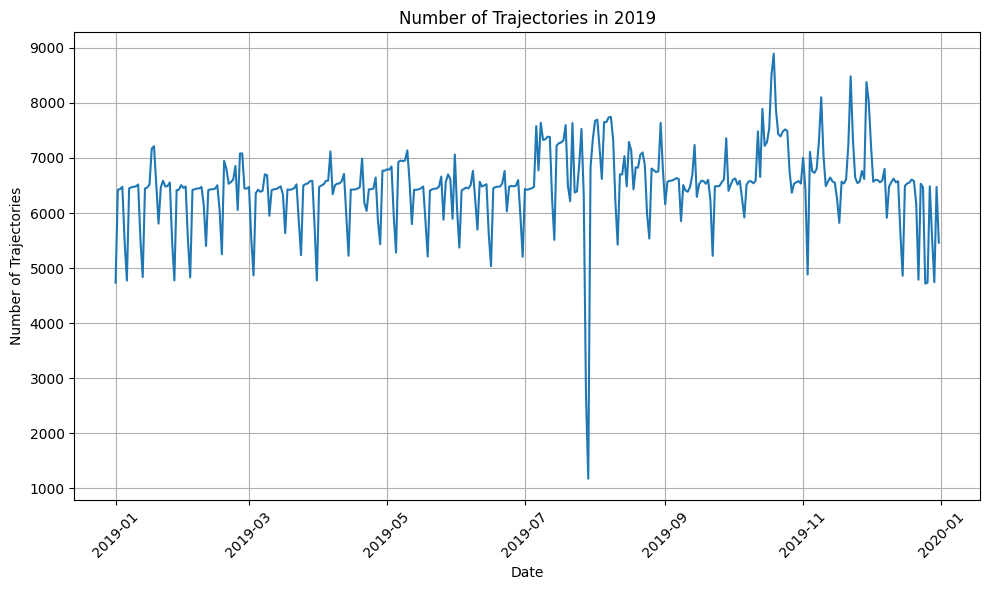

In [13]:
# Zoom in on 2019

# Filter the DataFrame for the year 2019
trajectories_2019 = trajectories_per_day[trajectories_per_day['Service:Date'].dt.year == 2019]

# Plot the number of trajectories for 2019
plt.figure(figsize=(10, 6))
plt.plot(trajectories_2019['Service:Date'], trajectories_2019['Nr. of Trajectories'], linestyle='-')

plt.title('Number of Trajectories in 2019')
plt.xlabel('Date')
plt.ylabel('Number of Trajectories')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# Find the date for the low peak
min_trajectories_row_2019 = trajectories_2019.loc[trajectories_2019['Nr. of Trajectories'].idxmin()]
print("Date with the minimum number of trajectories in 2019:", min_trajectories_row_2019['Service:Date'])
print(trajectories_per_day)

Date with the minimum number of trajectories in 2019: 2019-07-29 00:00:00
     Service:Date  Nr. of Trajectories  Year  Month  Day
0      2019-01-01                 4735  2019      1    1
1      2019-01-02                 6422  2019      1    2
2      2019-01-03                 6437  2019      1    3
3      2019-01-04                 6476  2019      1    4
4      2019-01-05                 5490  2019      1    5
...           ...                  ...   ...    ...  ...
1821   2023-12-27                 5916  2023     12  361
1822   2023-12-28                 5982  2023     12  362
1823   2023-12-29                 6177  2023     12  363
1824   2023-12-30                 5217  2023     12  364
1825   2023-12-31                 3538  2023     12  365

[1826 rows x 5 columns]


I wonder what the ups and downs during the week mean so let us zoom in to January of 2019 below.

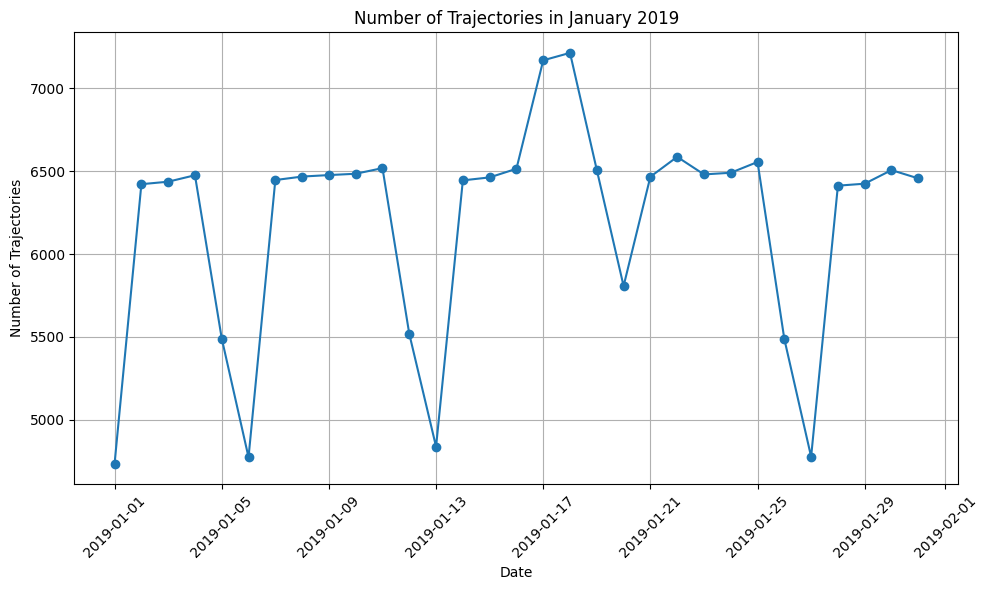

In [15]:
# Filter the DataFrame for the first month of 2019
trajectories_jan_2019 = trajectories_2019[(trajectories_2019['Service:Date'].dt.month == 1)]

# Plot the number of trajectories for January 2019
plt.figure(figsize=(10, 6))
plt.plot(trajectories_jan_2019['Service:Date'], trajectories_jan_2019['Nr. of Trajectories'], marker='o', linestyle='-')

plt.title('Number of Trajectories in January 2019')
plt.xlabel('Date')
plt.ylabel('Number of Trajectories')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

I know that the first of January in 2019 was a Tuesday, if we continue to count te days of the datapoints we see that the peaks are week days, on Saterday the number of lines decreases and on Sundays there are low points. On Monday the number of rides goes up again.

In the figure below we see a same trend for 2020. Let's see if for this year it is also the case that the peaks are for the week days.

In [16]:
# Export the info from that low-peak data

# Filter the DataFrame for the target date
target_date = '2019-07-29'
trajectories_for_target_date = combined_df_service[combined_df_service['Service:Date'] == target_date]

# Print the list of trajectories for the target date
print("List of trajectories for", target_date)
print(trajectories_for_target_date)
#trajectories_for_target_date.to_csv('peak_2019_info.csv', index=False)

List of trajectories for 2019-07-29
          Service:RDT-ID Service:Date          Service:Type Service:Company  \
11557519         2069656   2019-07-29              Sprinter              NS   
11557520         2069656   2019-07-29              Sprinter              NS   
11557521         2069656   2019-07-29              Sprinter              NS   
11557522         2069656   2019-07-29              Sprinter              NS   
11557523         2069656   2019-07-29              Sprinter              NS   
...                  ...          ...                   ...             ...   
11566448         2070829   2019-07-29  Stopbus i.p.v. trein              NS   
11566449         2070829   2019-07-29  Stopbus i.p.v. trein              NS   
11566450         2070829   2019-07-29  Stopbus i.p.v. trein              NS   
11566451         2070829   2019-07-29  Stopbus i.p.v. trein              NS   
11566452         2070829   2019-07-29  Stopbus i.p.v. trein              NS   

          Servi

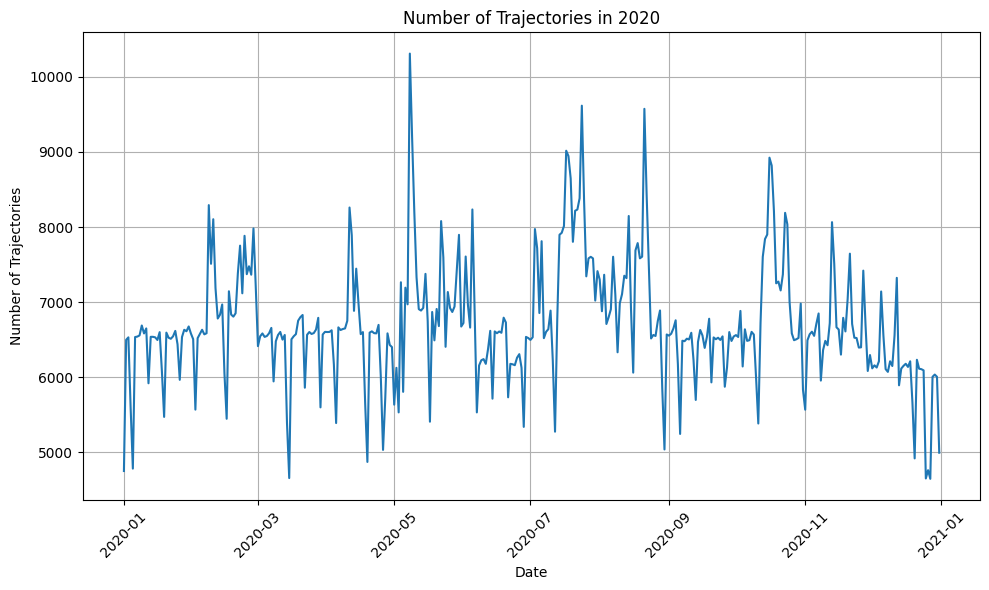

In [17]:
# Zoom in on 2020

# Filter the DataFrame for the year 2019
trajectories_2020 = trajectories_per_day[trajectories_per_day['Service:Date'].dt.year == 2020]

# Plot the number of trajectories for 2020
plt.figure(figsize=(10, 6))
plt.plot(trajectories_2020['Service:Date'], trajectories_2020['Nr. of Trajectories'], linestyle='-')

plt.title('Number of Trajectories in 2020')
plt.xlabel('Date')
plt.ylabel('Number of Trajectories')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

I now want to look at the most popular trajectories.

In [18]:
# Extract the first and last stops of each trajectory
first_stop = combined_df_service.groupby('Service:RDT-ID')['Stop:Station name'].first()
last_stop = combined_df_service.groupby('Service:RDT-ID')['Stop:Station name'].last()

# Create a DataFrame containing the trajectory name and count how many times each trajectory appears
trajectories_df = pd.DataFrame({'Trajectory': first_stop + ' - ' + last_stop})
trajectories_df['Count'] = trajectories_df.groupby('Trajectory')['Trajectory'].transform('count')
trajectories_df = trajectories_df.drop_duplicates()

# Sort the DataFrame in descending order based on the count
trajectories_df = trajectories_df.sort_values(by='Count', ascending=False)

# Print or use the trajectories_df DataFrame as needed
print(trajectories_df)

                                     Trajectory   Count
Service:RDT-ID                                         
738835            Den Haag Centraal - Dordrecht  104184
738905            Dordrecht - Den Haag Centraal  103759
739139                  Alphen a/d Rijn - Gouda  102119
738948                  Gouda - Alphen a/d Rijn  102111
739191                   Groningen - Leeuwarden   94060
...                                         ...     ...
6686730         Utrecht Lunetten - Geldermalsen       1
6680464          Brussel-Zuid Midi - Roosendaal       1
6677989                        Boxtel - Heerlen       1
1040945             Arnhem Presikhaaf - Zutphen       1
12691747           Holten - Deventer Colmschate       1

[6125 rows x 2 columns]


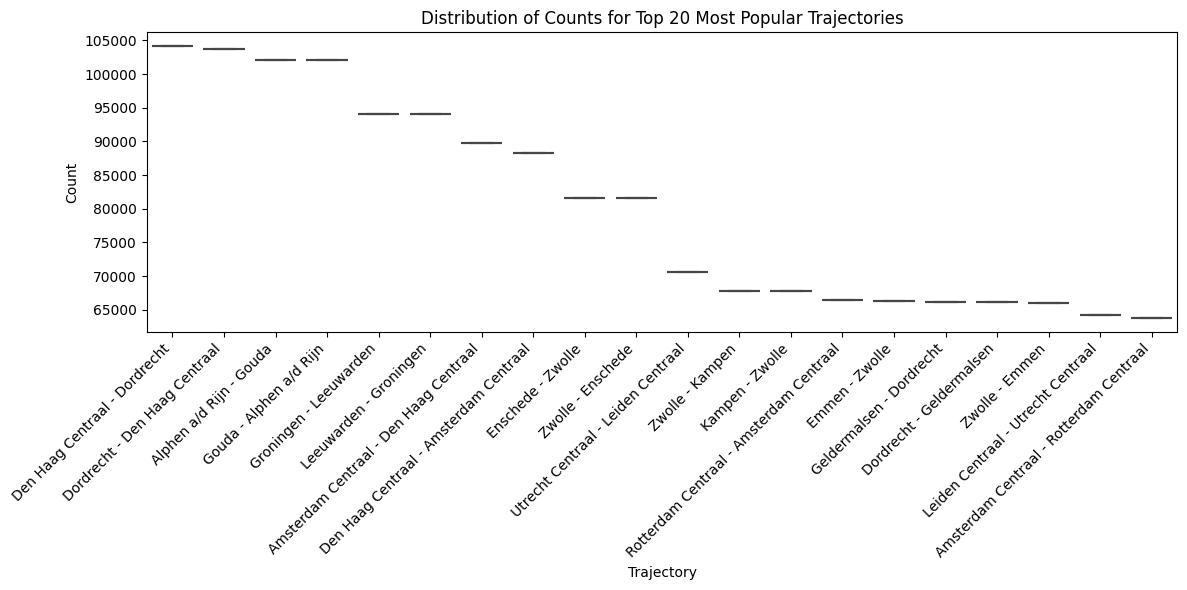

In [19]:
# Get the top 20 most popular trajectories
top_20_trajectories = trajectories_df.head(20)

# Filter the original DataFrame to include only the data for the top 20 trajectories
filtered_data = combined_df_service[combined_df_service['Service:RDT-ID'].isin(top_20_trajectories.index)]

# Merge the filtered_data with trajectories_df to get the count information
merged_data = pd.merge(filtered_data, trajectories_df, left_on='Service:RDT-ID', right_index=True)

# Sort the merged data by count in descending order
merged_data_sorted = merged_data.sort_values(by='Count', ascending=False)

# Plot the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Trajectory', y='Count', data=merged_data_sorted, order=top_20_trajectories['Trajectory'])
plt.title('Distribution of Counts for Top 20 Most Popular Trajectories')
plt.xlabel('Trajectory')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This is interesting because now we see that of course a trajectory goes two ways. So, it makes sense that the train goed from Den Haag to Dordrecht almost as many times as the train goed from Dordrecht to Den Haag. We will take this as a fact and not do anything with it.

Now we want to see how those trajectories changed over the years by looking at the top 10 per year of most popular trjaectories. After that we will analyze the trajectories that are not very popular and are only counted a few times. Those trajectories might not be taken into account since they are very rare.

In [20]:
# How does the top 5 trajectories differ over the years?

# Filter the DataFrame for the year 2019
data_2019 = combined_df_service[combined_df_service['Year'] == '2019']

# Extract the first and last stops of each trajectory for 2019 data
first_stop_2019 = data_2019.groupby('Service:RDT-ID')['Stop:Station name'].first()
last_stop_2019 = data_2019.groupby('Service:RDT-ID')['Stop:Station name'].last()

# Create a DataFrame containing the trajectory name and count how many times each trajectory appears
trajectories_2019_df = pd.DataFrame({'Trajectory': first_stop_2019 + ' - ' + last_stop_2019})
trajectories_2019_df['Count'] = trajectories_2019_df.groupby('Trajectory')['Trajectory'].transform('count')
trajectories_2019_df = trajectories_2019_df.drop_duplicates()

# Select the top 10 trajectories for 2019
top_trajectories_2019 = trajectories_2019_df.nlargest(10, 'Count')

# Print or use the top_trajectories_2019 DataFrame as needed
print(top_trajectories_2019)

                                            Trajectory  Count
Service:RDT-ID                                               
738832          Amsterdam Centraal - Den Haag Centraal  24834
738829          Den Haag Centraal - Amsterdam Centraal  24546
738835                   Den Haag Centraal - Dordrecht  21736
738905                   Dordrecht - Den Haag Centraal  21627
738948                         Gouda - Alphen a/d Rijn  19914
739139                         Alphen a/d Rijn - Gouda  19907
738973                               Enschede - Zwolle  16314
739053                               Zwolle - Enschede  16314
739191                          Groningen - Leeuwarden  16160
739196                          Leeuwarden - Groningen  16150


In [21]:
# Filter the DataFrame for the year 2020
data_2020 = combined_df_service[combined_df_service['Year'] == '2020']

# Extract the first and last stops of each trajectory for 2020 data
first_stop_2020 = data_2020.groupby('Service:RDT-ID')['Stop:Station name'].first()
last_stop_2020 = data_2020.groupby('Service:RDT-ID')['Stop:Station name'].last()

# Create a DataFrame containing the trajectory name and count how many times each trajectory appears
trajectories_2020_df = pd.DataFrame({'Trajectory': first_stop_2020 + ' - ' + last_stop_2020})
trajectories_2020_df['Count'] = trajectories_2020_df.groupby('Trajectory')['Trajectory'].transform('count')
trajectories_2020_df = trajectories_2020_df.drop_duplicates()

# Select the top 10 trajectories for 2020
top_trajectories_2020 = trajectories_2020_df.nlargest(10, 'Count')

# Print or use the top_trajectories_2020 DataFrame as needed
print(top_trajectories_2020)

                                            Trajectory  Count
Service:RDT-ID                                               
3107935         Amsterdam Centraal - Den Haag Centraal  23785
3107933         Den Haag Centraal - Amsterdam Centraal  23467
3108072                        Gouda - Alphen a/d Rijn  20627
3108268                        Alphen a/d Rijn - Gouda  20623
3107940                  Den Haag Centraal - Dordrecht  20580
3108025                  Dordrecht - Den Haag Centraal  20459
3108178                              Zwolle - Enschede  16178
3108093                              Enschede - Zwolle  16173
3108323                         Leeuwarden - Groningen  15806
3108325                         Groningen - Leeuwarden  15796


In [22]:
# Filter the DataFrame for the year 2021
data_2021 = combined_df_service[combined_df_service['Year'] == '2021']

# Extract the first and last stops of each trajectory for 2021 data
first_stop_2021 = data_2021.groupby('Service:RDT-ID')['Stop:Station name'].first()
last_stop_2021 = data_2021.groupby('Service:RDT-ID')['Stop:Station name'].last()

# Create a DataFrame containing the trajectory name and count how many times each trajectory appears
trajectories_2021_df = pd.DataFrame({'Trajectory': first_stop_2021 + ' - ' + last_stop_2021})
trajectories_2021_df['Count'] = trajectories_2021_df.groupby('Trajectory')['Trajectory'].transform('count')
trajectories_2021_df = trajectories_2021_df.drop_duplicates()

# Select the top 10 trajectories for 2021
top_trajectories_2021 = trajectories_2021_df.nlargest(10, 'Count')

# Print or use the top_trajectories_2021 DataFrame as needed
print(top_trajectories_2021)

                                            Trajectory  Count
Service:RDT-ID                                               
5561711         Amsterdam Centraal - Den Haag Centraal  24089
5561709         Den Haag Centraal - Amsterdam Centraal  23602
5561717                  Den Haag Centraal - Dordrecht  21640
5561801                  Dordrecht - Den Haag Centraal  21533
5562031                        Alphen a/d Rijn - Gouda  20636
5561845                        Gouda - Alphen a/d Rijn  20629
5561753                         Groningen - Leeuwarden  19834
5561744                         Leeuwarden - Groningen  19807
5561868                              Enschede - Zwolle  16018
5561945                              Zwolle - Enschede  16013


In [23]:
# Filter the DataFrame for the year 2022
data_2022 = combined_df_service[combined_df_service['Year'] == '2022']

# Extract the first and last stops of each trajectory for 2022 data
first_stop_2022 = data_2022.groupby('Service:RDT-ID')['Stop:Station name'].first()
last_stop_2022 = data_2022.groupby('Service:RDT-ID')['Stop:Station name'].last()

# Create a DataFrame containing the trajectory name and count how many times each trajectory appears
trajectories_2022_df = pd.DataFrame({'Trajectory': first_stop_2022 + ' - ' + last_stop_2022})
trajectories_2022_df['Count'] = trajectories_2022_df.groupby('Trajectory')['Trajectory'].transform('count')
trajectories_2022_df = trajectories_2022_df.drop_duplicates()

# Select the top 10 trajectories for 2022
top_trajectories_2022 = trajectories_2022_df.nlargest(10, 'Count')

# Print or use the top_trajectories_2022 DataFrame as needed
print(top_trajectories_2022)

                                        Trajectory  Count
Service:RDT-ID                                           
7914256              Den Haag Centraal - Dordrecht  21105
7914292                     Groningen - Leeuwarden  21079
7914285                     Leeuwarden - Groningen  21074
7914341              Dordrecht - Den Haag Centraal  21066
7914584                    Alphen a/d Rijn - Gouda  20265
7914390                    Gouda - Alphen a/d Rijn  20249
7914489                          Zwolle - Enschede  16644
7914412                          Enschede - Zwolle  16639
7914369         Leiden Centraal - Utrecht Centraal  14941
7914382         Utrecht Centraal - Leiden Centraal  14775


In [24]:
# Filter the DataFrame for the year 2023
data_2023 = combined_df_service[combined_df_service['Year'] == '2023']

# Extract the first and last stops of each trajectory for 2023 data
first_stop_2023 = data_2023.groupby('Service:RDT-ID')['Stop:Station name'].first()
last_stop_2023 = data_2023.groupby('Service:RDT-ID')['Stop:Station name'].last()

# Create a DataFrame containing the trajectory name and count how many times each trajectory appears
trajectories_2023_df = pd.DataFrame({'Trajectory': first_stop_2023 + ' - ' + last_stop_2023})
trajectories_2023_df['Count'] = trajectories_2023_df.groupby('Trajectory')['Trajectory'].transform('count')
trajectories_2023_df = trajectories_2023_df.drop_duplicates()

# Select the top 10 trajectories for 2023
top_trajectories_2023 = trajectories_2023_df.nlargest(10, 'Count')

# Print or use the top_trajectories_2023 DataFrame as needed
print(top_trajectories_2023)

                                             Trajectory  Count
Service:RDT-ID                                                
10367742                         Groningen - Leeuwarden  21191
10367737                         Leeuwarden - Groningen  21176
10367896        Rotterdam Centraal - Amsterdam Centraal  20741
10368139                        Gouda - Alphen a/d Rijn  20692
10368210                        Alphen a/d Rijn - Gouda  20688
10367993        Amsterdam Centraal - Rotterdam Centraal  19178
10368123                  Den Haag Centraal - Dordrecht  19123
10368224                  Dordrecht - Den Haag Centraal  19074
10367786                              Enschede - Zwolle  16521
10367815                              Zwolle - Enschede  16504


Let's now count the number of trajectories that are very rare. We can adjust the threshold as preferred.

In [28]:
# Filter trajectories_df for trajectories used 1-50 times
rare_trajectories = trajectories_df[(trajectories_df['Count'] >= 1) & (trajectories_df['Count'] <= 50)]

# Print and count the rare trajectories
for index, row in rare_trajectories.iterrows():
    print(f"{row['Trajectory']} ({row['Count']})")
    
# Count the total number of rare trajectories
total_rare_trajectories = rare_trajectories['Count']
print(f"Total rare trajectories: {total_rare_trajectories}")

Almere Oostvaarders - Amersfoort Vathorst (50)
Amsterdam Bijlmer ArenA - Roermond (50)
Lage Zwaluwe - Dordrecht Zuid (50)
Zevenaar - Duisburg Hbf (50)
Tilburg Universiteit - Arnhem Centraal (50)
Bussum Zuid - Amsterdam RAI (50)
Deventer - Apeldoorn Osseveld (50)
Venlo - Almere Oostvaarders (50)
Delft Campus - Amsterdam Muiderpoort (50)
Rotterdam Centraal - Hoorn (50)
Schiphol Airport - Hengelo (50)
Zwolle - Hilversum (49)
Delft - Utrecht Centraal (49)
Helmond - Eindhoven (49)
Zaandam - Haarlem (49)
Roosendaal - Leiden Centraal (49)
Arnhem Centraal - Alkmaar (49)
Weesp - Haarlem (49)
Den Helder - Amsterdam Sloterdijk (49)
Amsterdam Sloterdijk - Arnhem Centraal (49)
Den Haag Centraal - Zaandam (49)
Sliedrecht - Gorinchem (49)
Amersfoort Centraal - Amsterdam Zuid (49)
Driebergen-Zeist - Den Haag Centraal (48)
Mariënberg - Rotterdam Alexander (48)
Heerlen - Amsterdam Amstel (48)
Emmerich - Oberhausen Hbf (48)
Delft Campus - Amsterdam Bijlmer ArenA (48)
Roermond - Zaandam (48)
Schiphol Airp

We see that around 3000 of the 6000 trajectories are pretty rare. This is quite a lot and good to take into considerations.

It might be handy to extract the ID's of the rare trajectories so we can delete them from our dataset later.

In [27]:
# Get the RDT-IDs of rare trajectories
rdt_ids = []
for trajectory in rare_trajectories.index:
    rdt_ids.extend(combined_df_service[combined_df_service['Service:RDT-ID'] == trajectory]['Service:RDT-ID'].unique())

# Convert the list of RDT-IDs to a set to remove duplicates
rdt_ids = set(rdt_ids)

# Print the RDT-IDs of rare trajectories
print("RDT-IDs of rare trajectories:")
for rdt_id in rdt_ids:
    print(rdt_id)

RDT-IDs of rare trajectories:
2850820
3031044
6078470
7766020
2105352
8577032
7381002
4128781
10158094
9879567
884753
8683544
7118873
12460062
2900000
1359906
2392100
4743206
3866663
1876009
1876013
7585838
3866676
11010101
7209017
9871419
9363516
1245249
9904197
1876038
6692933
10199117
12312653
1482833
9723988
2474069
6611030
8749144
7118936
3063898
7118939
5242984
11870313
942188
9527406
12402799
9281656
12640377
1736826
12460158
1499264
1876098
1654915
9216133
770187
1736845
11534477
8454290
942231
10698904
4554907
10961052
4604061
4800672
5824675
1810596
2810025
2097326
4047025
3358900
7119028
7119034
5882044
770237
7307458
811203
1261762
3858633
942282
5308618
9904333
11370701
6250704
1040593
4128978
2900179
3866834
1867987
3866840
12230873
5349593
11141338
10150108
1876201
2818283
4104440
12452088
5406968
9896184
8225020
6406392
9879806
3358976
6119683
11059463
2474249
6119692
4645132
10068241
3866900
1949974
8634653
1876254
6054173
6627617
9453865
2670890
6078763
811307
1061713

How about the rides that are partly cancelled or completely cancelled?

In [25]:
# What to do with the services that are partly or completely cancelled?
# Analyze those here and decide what to do with those in the Data Cleaning section (part 3)

# Count the number of rides that are partly cancelled and completely cancelled for the entire dataset
cancelled_counts = combined_df_service['Service:Partly cancelled'].value_counts()
completely_cancelled_counts = combined_df_service['Service:Completely cancelled'].value_counts()

# Print the counts
print("Partly Cancelled Trajectories:")
print(cancelled_counts)

print("\nCompletely Cancelled Trajectories:")
print(completely_cancelled_counts)

Partly Cancelled Trajectories:
Service:Partly cancelled
False    98725816
True      9366283
Name: count, dtype: int64

Completely Cancelled Trajectories:
Service:Completely cancelled
False    104332633
True       3759466
Name: count, dtype: int64


In [30]:
# Group the data by Service:Company and count the number of trajectories for each company
company_trajectory_counts = combined_df_service.groupby('Service:Company')['Service:RDT-ID'].nunique()

# Sort the Series in descending order
company_trajectory_counts = company_trajectory_counts.sort_values(ascending=False)

# Print the company_trajectory_counts Series
print(company_trajectory_counts)

#### Delays <a name="3a2.-delays"></a>
In this section I will zoom into the delays and see the distribution on delays over time.

In [60]:
# Show the maximum delay per trajectory

# Extract the first stop and maximum delay of each trajectory
first_stop_max_delay = combined_df_service.groupby('Service:RDT-ID').agg({'Stop:Station name': 'first', 'Service:Maximum delay': 'first'})

# Create a DataFrame containing the trajectory name, first stop, and maximum delay
trajectories_df = pd.DataFrame({'Trajectory': first_stop + ' - ' + last_stop,
                                'Maximum Delay': first_stop_max_delay['Service:Maximum delay']})

# Print or use the trajectories_df DataFrame as needed
print(trajectories_df)

                                           Trajectory  Maximum Delay
Service:RDT-ID                                                      
738804          Rotterdam Centraal - Utrecht Centraal              1
738805          Utrecht Centraal - Rotterdam Centraal              2
738806          Rotterdam Centraal - Utrecht Centraal              2
738807          Utrecht Centraal - Rotterdam Centraal              2
738808          Rotterdam Centraal - Utrecht Centraal              1
...                                               ...            ...
12703954                       Tiel - Leiden Centraal             10
12704321                Uitgeest - Rotterdam Centraal              4
12704322                Rotterdam Centraal - Uitgeest              1
12704635                        Nijmegen - Den Helder              1
12705364               Enkhuizen - Eindhoven Centraal              2

[11952395 rows x 2 columns]


In [61]:
# Filter the DataFrame to include only trajectories with a maximum delay of more than 1 minute
delayed_trajectories = trajectories_df[trajectories_df['Maximum Delay'] > 1]

# Count the number of times there is a maximum delay on each trajectory
delayed_trajectories_count = delayed_trajectories['Trajectory'].value_counts().reset_index()
delayed_trajectories_count.columns = ['Trajectory', 'Count']

# Sort the DataFrame in descending order based on the count
delayed_trajectories_count = delayed_trajectories_count.sort_values(by='Count', ascending=False)

# Print or use the delayed_trajectories_count DataFrame as needed
print(delayed_trajectories_count)

                                     Trajectory  Count
0                           Roosendaal - Zwolle  38924
1                           Roermond - Nijmegen  38370
2               Vlissingen - Amsterdam Centraal  36867
3                         Den Helder - Nijmegen  35499
4                           Nijmegen - Roermond  35477
...                                         ...    ...
3324             Leiden Centraal - Geldermalsen      1
3325          Amsterdam Bijlmer ArenA - Haarlem      1
3326  Houten Castellum - Utrecht Vaartsche Rijn      1
3327           Lelystad Centrum - Amsterdam RAI      1
3827                           Meppel - Wolvega      1

[3828 rows x 2 columns]


In [19]:
# Delays per trajectory per day

# Filter the dataset to include only the first mention of each Service:RDT-ID
first_stops = combined_df_service.groupby('Service:RDT-ID').first().reset_index()

# Extract the Service:Maximum delay for each first mention of Service:RDT-ID
maximum_delays = first_stops[['Service:RDT-ID','Service:Date', 'Service:Maximum delay']]

# Print or use the maximum_delays DataFrame as needed
print(maximum_delays)

          Service:RDT-ID Service:Date  Service:Maximum delay
0                 738804   2019-01-01                      1
1                 738805   2019-01-01                      2
2                 738806   2019-01-01                      2
3                 738807   2019-01-01                      2
4                 738808   2019-01-01                      1
...                  ...          ...                    ...
11952390        12703954   2023-12-31                     10
11952391        12704321   2023-12-31                      4
11952392        12704322   2023-12-31                      1
11952393        12704635   2023-12-31                      1
11952394        12705364   2023-12-31                      2

[11952395 rows x 3 columns]


/var/folders/3g/j8k6m66124x5lcy646zpdz680000gn/T/ipykernel_13437/3981783985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maximum_delays['Service:Date'] = pd.to_datetime(maximum_delays['Service:Date'])
/var/folders/3g/j8k6m66124x5lcy646zpdz680000gn/T/ipykernel_13437/3981783985.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maximum_delays['Year'] = maximum_delays['Service:Date'].dt.year
/var/folders/3g/j8k6m66124x5lcy646zpdz680000gn/T/ipykernel_13437/3981783985.py:6: SettingWithCopyWarning: 
A val

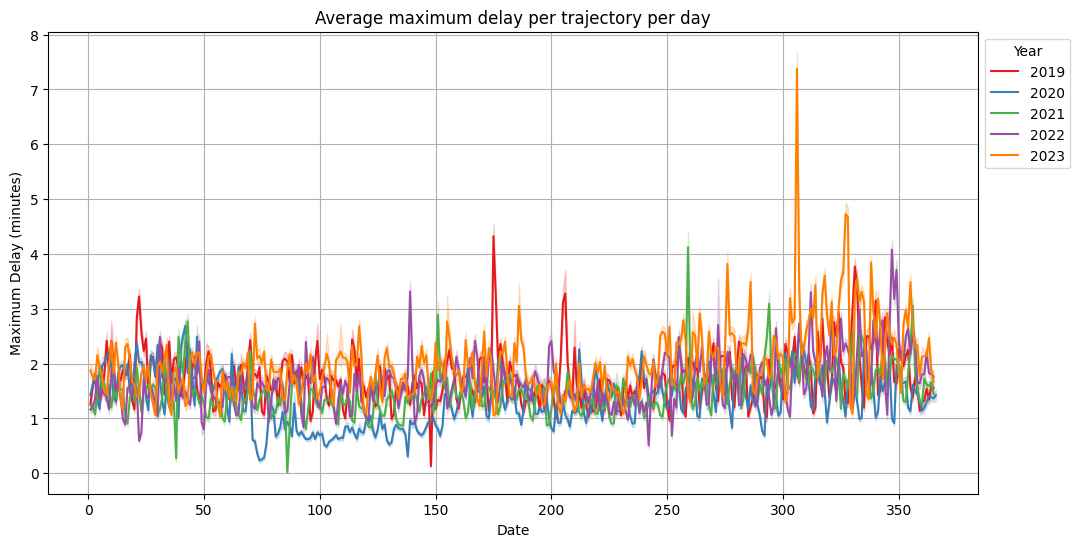

In [20]:
# Convert 'Service:Date' to datetime
maximum_delays['Service:Date'] = pd.to_datetime(maximum_delays['Service:Date'])

# Extract year from 'Service:Date'
maximum_delays['Year'] = maximum_delays['Service:Date'].dt.year
maximum_delays['Month'] = maximum_delays['Service:Date'].dt.month
maximum_delays['Day'] = maximum_delays['Service:Date'].dt.dayofyear

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='Day', y='Service:Maximum delay', hue='Year', data=maximum_delays, palette='Set1')
plt.title('Average maximum delay per trajectory per day')
plt.xlabel('Date')
plt.ylabel('Maximum Delay (minutes)')
plt.legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.show()

It would be nice to have an overview of of the amount of delayed trajectories for different thresholds. Let's display that below.

In [72]:
# Overview delayed trajectories for different thresholds

# Define the delay thresholds
thresholds = [0, 1, 6, 11, 16, float('inf')]

# Use pd.cut to categorize the delays into bins
maximum_delays['Delay Category'] = pd.cut(maximum_delays['Service:Maximum delay'], bins=thresholds, right=False, labels=['0 minutes', '1-5 minutes', '6-10 minutes', '11-15 minutes', 'More than 15 minutes'])

# Count the number of trajectories in each delay category
trajectory_counts = maximum_delays['Delay Category'].value_counts().reset_index().rename(columns={'index': 'Delay Range', 'Delay Category': 'Number of Trajectories'})

# Print or use the trajectory_counts DataFrame as needed
print(trajectory_counts)

  Number of Trajectories    count
0            1-5 minutes  6386763
1              0 minutes  4884805
2           6-10 minutes   433493
3          11-15 minutes   124968
4   More than 15 minutes   122355


/var/folders/3g/j8k6m66124x5lcy646zpdz680000gn/T/ipykernel_13437/21685576.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maximum_delays['Delay Category'] = pd.cut(maximum_delays['Service:Maximum delay'], bins=thresholds, right=False, labels=['0 minutes', '1-5 minutes', '6-10 minutes', '11-15 minutes', 'More than 15 minutes'])


#### Percentage of delayed edges 

We now want to look at the share of delayed edges compared to the non-delayed edges so we can see if this is similar to our baseline model.

/var/folders/3g/j8k6m66124x5lcy646zpdz680000gn/T/ipykernel_8560/3506660030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ns_data_definite['Service:Date'] = pd.to_datetime(ns_data_definite['Service:Date'])
/var/folders/3g/j8k6m66124x5lcy646zpdz680000gn/T/ipykernel_8560/3506660030.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ns_data_definite['Year'] = ns_data_definite['Service:Date'].dt.year
/var/folders/3g/j8k6m66124x5lcy646zpdz680000gn/T/ipykernel_8560/3506660030.py:6: SettingWithCopyWarning: 


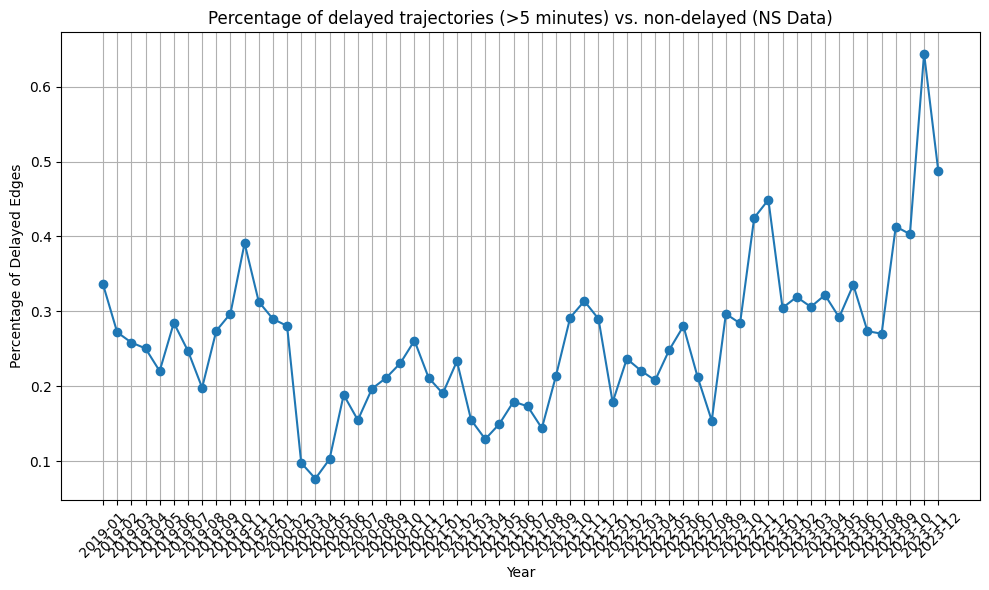

In [8]:
# Convert 'Service:Date' column to datetime format
ns_data_definite['Service:Date'] = pd.to_datetime(ns_data_definite['Service:Date'])

# Extract year and month from the datetime column
ns_data_definite['Year'] = ns_data_definite['Service:Date'].dt.year
ns_data_definite['Month'] = ns_data_definite['Service:Date'].dt.month

# Filter the NS data for delayed edges (maximum delay > 5 minutes) and non-delayed edges (maximum delay = 0)
ns_delayed_edges = ns_data_definite[ns_data_definite.groupby('Service:RDT-ID')['Service:Maximum delay'].transform('first') > 5]
ns_non_delayed_edges = ns_data_definite[ns_data_definite.groupby('Service:RDT-ID')['Service:Maximum delay'].transform('first') == 0]

# Group the NS data by month and count the number of trajectories with delayed and non-delayed edges for each month
ns_delayed_counts = ns_delayed_edges.groupby(ns_data_definite['Service:Date'].dt.to_period('M')).size()
ns_non_delayed_counts = ns_non_delayed_edges.groupby(ns_data_definite['Service:Date'].dt.to_period('M')).size()

# Calculate the percentage of delayed edges compared to non-delayed edges for each month
ns_percentage_delayed = (ns_delayed_counts / (ns_delayed_counts + ns_non_delayed_counts)) 

# Plot the percentages for NS data
plt.figure(figsize=(10, 6))
plt.plot(ns_percentage_delayed.index.astype(str), ns_percentage_delayed.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Percentage of Delayed Edges')
plt.title('Percentage of delayed trajectories (>5 minutes) vs. non-delayed (NS Data)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Disruption Data <a name="3b.-disruption-data"></a>

There is a big chance that I will not use this distruption data in my model because there are many big outliers and the data is not complete. However, I will provide he general evaluation that I have done for this data.

In [8]:
# Display the first few lines of the combined dataframe
print("First few lines:")
print(combined_df_disruptions.head())

# Display the last few lines of the combined dataframe
#print("\nLast few lines:")
#print(combined_df_disruptions.tail())

First few lines:
   rdt_id                              ns_lines  \
0   40500  Den Haag-Rotterdam; Leiden-Rotterdam   
1   40501  Amsterdam-Utrecht; Utrecht-Eindhoven   
2   40502              Schiphol-Rotterdam (HSL)   
3   40503                       Eindhoven-Venlo   
4   40504     Alkmaar-Den Helder; Alkmaar-Hoorn   

                                           rdt_lines rdt_lines_id  \
0                   Den Haag HS - Rotterdam Centraal           11   
1  's-Hertogenbosch - Utrecht Centraal, Amsterdam...      136,151   
2        Rotterdam Centraal - Schiphol Airport (HSL)           24   
3                                  Eindhoven - Venlo           65   
4              Alkmaar - Den Helder, Alkmaar - Hoorn      162,163   

                                   rdt_station_names  \
0  Delft,Delft Campus,Den Haag HS,Den Haag Moerwi...   
1  Abcoude,Amsterdam Amstel,Amsterdam Bijlmer Are...   
2                Rotterdam Centraal,Schiphol Airport   
3                 Blerick,Deurne,Hors

In [73]:
# Display the columns of the service dataset

# Shows the columns of the disruptions data, their counts and the data type
print(combined_df_disruptions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49900 entries, 0 to 49899
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rdt_id                49900 non-null  int64  
 1   ns_lines              49900 non-null  object 
 2   rdt_lines             48726 non-null  object 
 3   rdt_lines_id          48726 non-null  object 
 4   rdt_station_names     35198 non-null  object 
 5   rdt_station_codes     35198 non-null  object 
 6   cause_nl              49715 non-null  object 
 7   cause_en              49715 non-null  object 
 8   statistical_cause_nl  49715 non-null  object 
 9   statistical_cause_en  49715 non-null  object 
 10  cause_group           49900 non-null  object 
 11  start_time            49900 non-null  object 
 12  end_time              49803 non-null  object 
 13  duration_minutes      49802 non-null  float64
 14  Year                  49900 non-null  object 
dtypes: float64(1), int6

#### General Distribution <a name="3b1.-general-distribution"></a>

Let's look at the distribution of datapoints per year and per month. After that we will look at the COVID years.

In [10]:
# Count the number of data points for each year & the total
year_counts_disruptions = combined_df_disruptions['Year'].value_counts()
year_counts_sorted_disruptions = year_counts_disruptions.sort_index()
total_data_points_disruptions = year_counts_disruptions.sum()

# Print the counts for each year & the total
print("Year\t\tData Points")
print("-----------------------------")
for year, count in year_counts_sorted_disruptions.items():
    print(f"{year}\t\t{count}")
print("-----------------------------")
print("Total Data Points for All Years:", total_data_points_disruptions)

Year		Data Points
-----------------------------
2011		1846
2012		2074
2013		2312
2014		2484
2015		2947
2016		3031
2017		4085
2018		5190
2019		5940
2020		4450
2021		4874
2022		5499
2023		5168
-----------------------------
Total Data Points for All Years: 49900


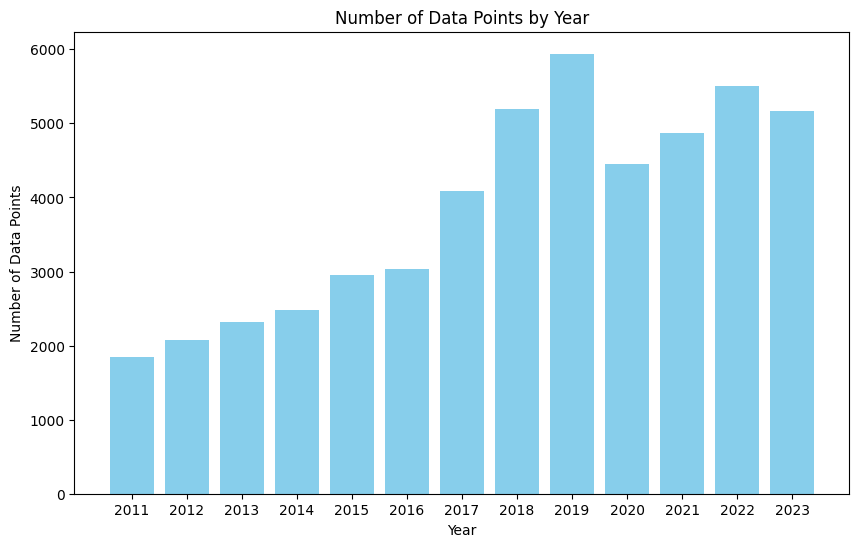

In [13]:
# Plot the counts for each year
plt.figure(figsize=(10, 6))
plt.bar(year_counts_sorted_disruptions.index, year_counts_sorted_disruptions.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points by Year')
  
plt.show()

<Figure size 1400x600 with 0 Axes>

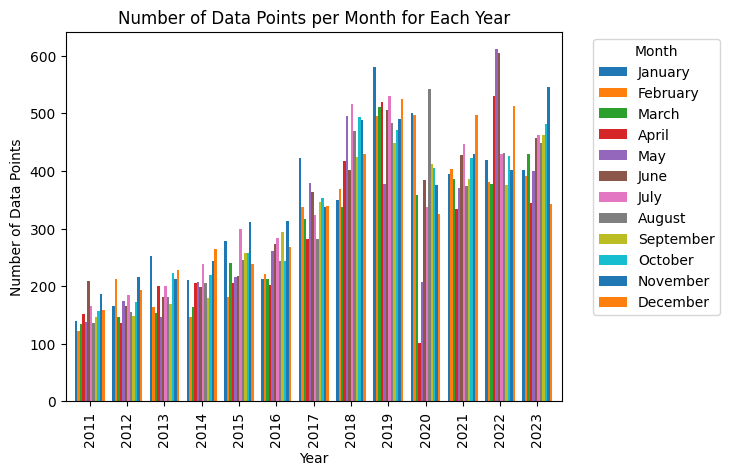

In [15]:
# Assuming 'start_time' is in datetime format, if not, convert it first
combined_df_disruptions['start_time'] = pd.to_datetime(combined_df_disruptions['start_time'])

# Extract the year and month from the 'start_time' column
combined_df_disruptions['Year'] = combined_df_disruptions['start_time'].dt.year
combined_df_disruptions['Month'] = combined_df_disruptions['start_time'].dt.month

# Group the data by year and month and count the occurrences
year_month_counts = combined_df_disruptions.groupby(['Year', 'Month']).size().unstack(fill_value=0)

# Plot the counts for each month in each year
plt.figure(figsize=(14, 6))
ax = year_month_counts.plot(kind='bar', stacked=False, width=0.8)
        
plt.xlabel('Year')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points per Month for Each Year')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')

month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Get the current legend labels
handles, labels = ax.get_legend_handles_labels()
# Update the legend labels with month names
updated_labels = [month_names[int(label)] for label in labels]
# Set the updated legend labels
ax.legend(handles, updated_labels, title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Disruptions <a name="3b2.-disruptions"></a>

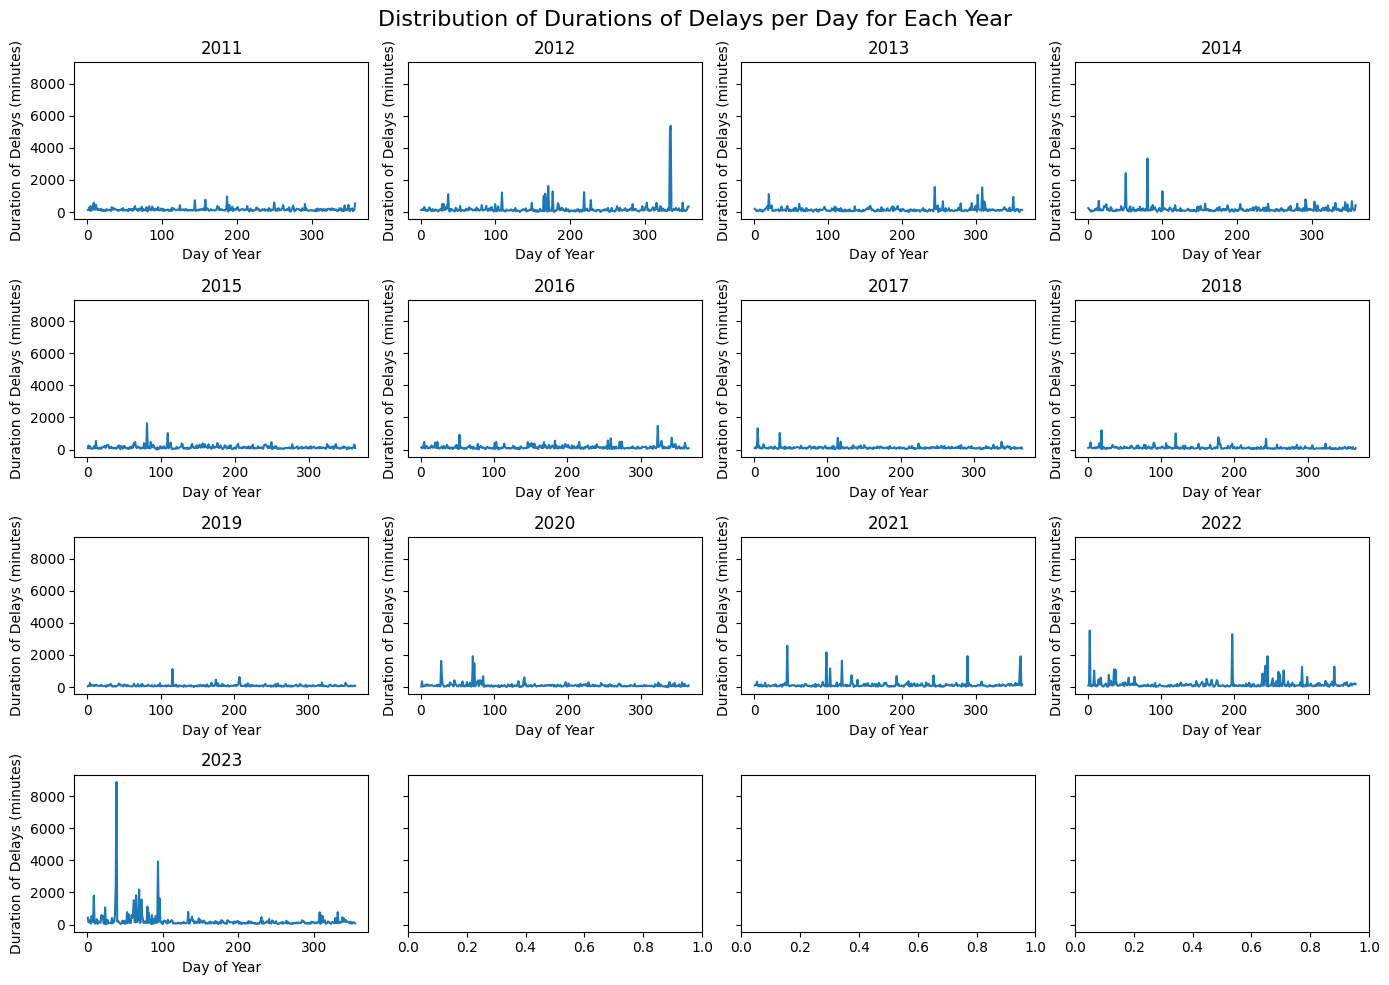

In [16]:
# Group the data by year and day and calculate the average duration of delays
avg_duration_per_year_day = combined_df_disruptions.groupby(['Year', combined_df_disruptions['start_time'].dt.date])['duration_minutes'].mean()

# Plot the distribution of durations of delays for each year
fig, axs = plt.subplots(4, 4, figsize=(14, 10), sharey=True)
fig.suptitle('Distribution of Durations of Delays per Day for Each Year', fontsize=16)
years = sorted(combined_df_disruptions['Year'].unique())
for i, year in enumerate(years):
    row = i // 4
    col = i % 4
    year_data = avg_duration_per_year_day[year]
    days = range(1, len(year_data) + 1)
    axs[row, col].plot(days, year_data.values, linestyle='-')
    axs[row, col].set_title(year)
    axs[row, col].set_xlabel('Day of Year')
    axs[row, col].set_ylabel('Duration of Delays (minutes)')

plt.tight_layout()
plt.show()

In [9]:
# Replace 'duration_minutes' and 'Year' with your actual column names if they are different
minutes_delay = combined_df_disruptions['duration_minutes']
years = combined_df_disruptions['Year']

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Plotting a separate line for each year
for year, delay in zip(years, minutes_delay):
    plt.plot([year], [delay], marker='o', label=str(year))

plt.title('Minutes Delay per Year')
plt.xlabel('Year')
plt.ylabel('Minutes Delay')
plt.legend()
plt.grid(True)

plt.show()

/Users/merelkamper/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: Image size of 868x1045181 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x600 with 1 Axes>

#### Outliers <a name="3b3.-outliers"></a>

In [17]:
# Set a threshold value for the duration of delays (in minutes)
threshold = 500  # Adjust this value as needed

# Filter the data to identify outliers
outliers = combined_df_disruptions[combined_df_disruptions['duration_minutes'] > threshold]

# Print the list of dates and duration_minutes for the outliers
print("Outliers:")
print(outliers[['start_time', 'duration_minutes']])
print(outliers.count)

Outliers:
               start_time  duration_minutes
18    2022-01-03 05:08:03             610.0
22    2022-01-03 09:07:30           44016.0
82    2022-01-08 12:50:52             592.0
87    2022-01-09 07:00:32            7362.0
91    2022-01-09 14:05:12             585.0
...                   ...               ...
49755 2013-12-08 07:48:02            1147.0
49767 2013-12-09 18:27:01             644.0
49799 2013-12-13 17:01:02             728.0
49835 2013-12-18 12:59:01            1647.0
49866 2013-12-24 10:10:01             565.0

[2371 rows x 2 columns]
<bound method DataFrame.count of        rdt_id                                           ns_lines  \
18      40518                   Venlo-Mönchengladbach-Düsseldorf   
22      40522                                  Hengelo-Bielefeld   
82      40582                                  Hengelo-Bielefeld   
87      40587                                  Hengelo-Bielefeld   
91      40591                 Amsterdam-Utrecht; Amsterdam-Gouda

In [ ]:
# TODO 
# Find causes for outliers



In [62]:
# TODO 
# Explain why I will not use these

